In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#display all df columns
pd.set_option('display.max_columns', None)

# LIWC Counts

In [3]:
liwc = pd.read_csv('../results/liwc_ratios_full.csv.gz', compression='gzip').drop('Unnamed: 69', axis=1)

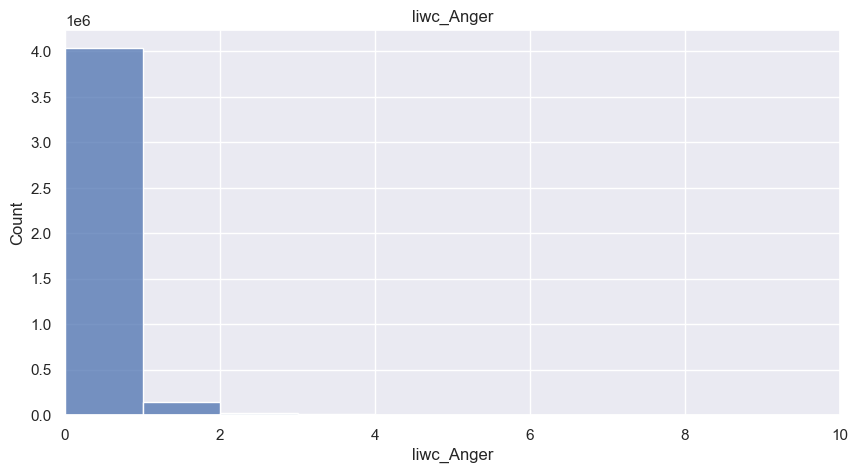

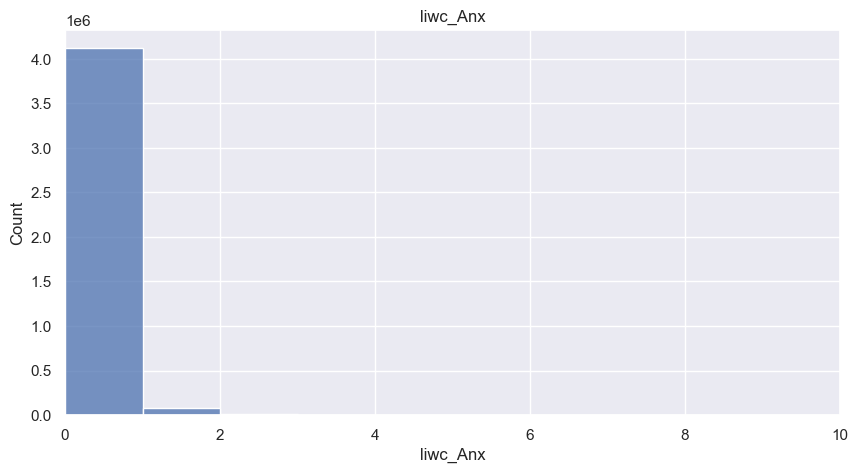

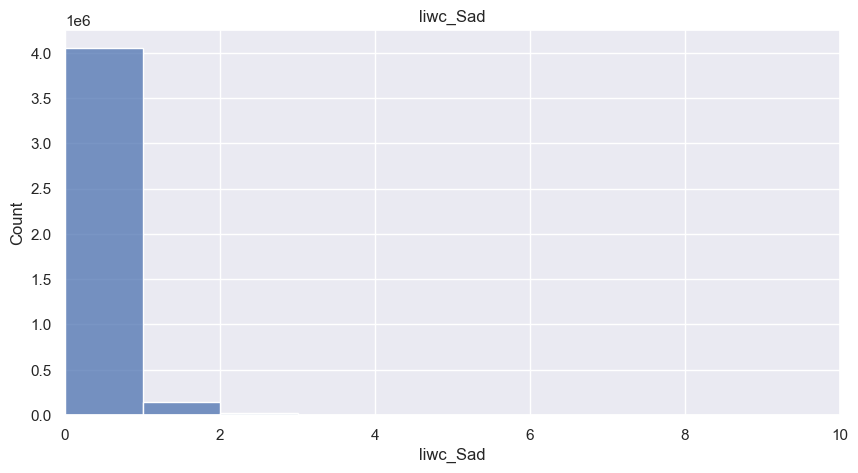

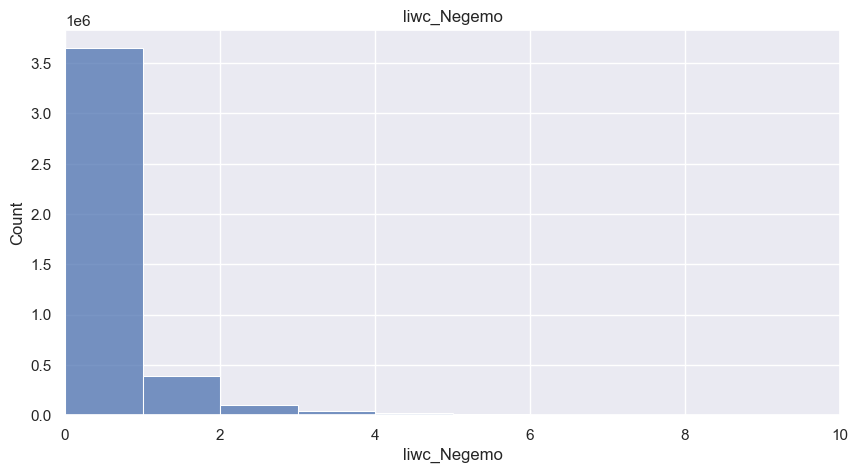

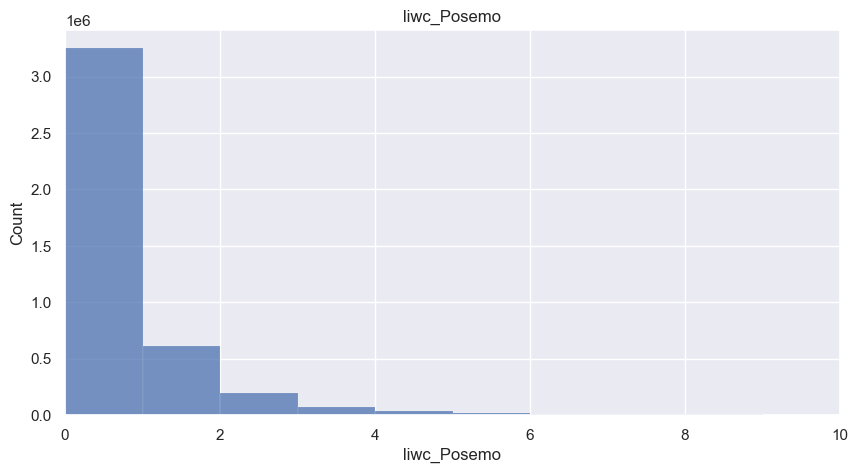

In [30]:
liwc_features = liwc.columns[1:]
for col in ['liwc_Anger', 'liwc_Anx', 'liwc_Sad', 'liwc_Negemo', 'liwc_Posemo']:
    sns.histplot(liwc[col], binwidth=1)
    plt.xlim(0,10)
    plt.title(col)
    plt.show()

# Merging and Aggregating

In [5]:
data = pd.read_csv('../data/samples/messages_sample_full.csv.gzip', compression='gzip').drop('Unnamed: 0', axis=1)
#only keep messages from 100 authors with most messages
data = data[data['author'].isin(data['author'].value_counts().head(100).index)]

In [6]:
#concat liwc and data based on UID_key
merged = data.merge(liwc, on='UID_key', how='inner')
merged = merged.dropna(subset=['final_message_string']) #not necessary if sample of authors is taken

In [7]:
#aggregate features based for each author
grouped = merged.drop(['UID_key', 'group_or_channel', 'final_message'], axis = 1)
#drop columns
agg_dict = {col: 'sum' for col in liwc_features}
agg_dict['final_message_string'] = ' '.join

grouped = grouped.groupby('author').agg(agg_dict)

In [8]:
grouped.head(5)

liwc_Pronoun  liwc_I  liwc_We  liwc_Self  liwc_You  liwc_Other  \
author                                                                          
-9.156478e+18         15471    4182     1556       5738      6035        4067   
-9.116666e+18          2705     822      328       1150       354        1303   
-9.029508e+18         42359   13684     3305      16989     12613       13087   
-8.924470e+18          2286     965      255       1220       374         763   
-8.315076e+18          4950    2020      551       2571       904        1470   

               liwc_Negate  liwc_Assent  liwc_Article  liwc_Preps  \
author                                                              
-9.156478e+18         4207         1389         16723       13626   
-9.116666e+18          601          113          3769        3209   
-9.029508e+18         5552         2885         29178       20638   
-8.924470e+18          673          325          2259        1633   
-8.315076e+18         1360          948          4364        2892   

               liwc_Number  liwc_Affect  liwc_Posemo  liwc_Posfeel  \
author                                                               
-9.156478e+18          671         8556         5195           288   
-9.116666e+18          150         2107         1095           112   
-9.029508e+18          991        17999        13046           852   
-8.924470e+18           66         1617         1082            77   
-8.315076e+18          136         2434         1691           102   

               liwc_Optim  liwc_Negemo  liwc_Anx  liwc_Anger  liwc_Sad  \
author                                                                   
-9.156478e+18        1100         3345       260         745       642   
-9.116666e+18         282         1007       143         303       161   
-9.029508e+18        3137         4953       716        1100       844   
-8.924470e+18         195          535        59         151        92   
-8.315076e+18         456          743        98         161       204   

               liwc_Cogmech  liwc_Cause  liwc_Insight  liwc_Discrep  \
author                                                                
-9.156478e+18         18133        3734          5109          4148   
-9.116666e+18          3500         532           870           537   
-9.029508e+18         41532        7091         11561          7845   
-8.924470e+18          2385         397           610           452   
-8.315076e+18          5138         870          1238          1078   

               liwc_Inhib  liwc_Tentat  liwc_Certain  liwc_Senses  liwc_See  \
author                                                                        
-9.156478e+18         653         2154          3476          359       165   
-9.116666e+18         174          600           997           58        31   
-9.029508e+18        1430         4334         12061          647       163   
-8.924470e+18          91          203           728           94        30   
-8.315076e+18         107          517          1596          130        61   

               liwc_Hear  liwc_Feel  liwc_Social  liwc_Comm  liwc_Othref  \
author                                                                     
-9.156478e+18        131         28        16219       2936        12060   
-9.116666e+18         13         12         2814        622         2174   
-9.029508e+18        417         26        38409       6559        31899   
-8.924470e+18         38          4         2084        430         1606   
-8.315076e+18         45          4         3973        750         3517   

               liwc_Friends  liwc_Family  liwc_Humans  liwc_Time  liwc_Past  \
author                                                                        
-9.156478e+18           238          522         1468       6787       4306   
-9.116666e+18            44           82          243       1744        799   
-9.029508e+18           195         1327         237

# Distribution of LIWC2007 Categories (Counts)

In [9]:
grouped.describe()

liwc_Pronoun       liwc_I       liwc_We     liwc_Self      liwc_You  \
count     100.000000    100.00000    100.000000    100.000000    100.000000   
mean    13413.100000   3103.79000   1743.600000   4847.390000   3412.620000   
std     24918.470923   5141.13552   3903.918601   8207.486475   7821.416842   
min       107.000000     35.00000      3.000000     45.000000     21.000000   
25%      2669.750000    855.00000    230.250000   1241.000000    581.750000   
50%      6565.000000   1792.50000    589.000000   2542.500000   1501.000000   
75%     11726.500000   3512.50000   1176.250000   5056.250000   2545.000000   
max    161786.000000  43692.00000  24930.000000  56236.000000  62821.000000   

          liwc_Other   liwc_Negate  liwc_Assent   liwc_Article     liwc_Preps  \
count     100.000000    100.000000   100.000000     100.000000     100.000000   
mean     6223.110000   2996.810000   724.210000   18666.310000   16345.510000   
std     14182.960518   5424.127266  1100.507048   50599.800259   46144.581776   
min        49.000000     32.000000     7.000000      72.000000      69.000000   
25%      1121.750000    672.250000   206.250000    2835.750000    2472.500000   
50%      2428.500000   1604.000000   480.000000    6512.000000    5434.500000   
75%      4627.500000   2858.750000   813.000000   12394.750000   10263.500000   
max    101945.000000  38490.000000  8729.000000  435017.000000  395083.000000   

        liwc_Number    liwc_Affect   liwc_Posemo  liwc_Posfeel    liwc_Optim  \
count    100.000000     100.000000    100.000000    100.000000    100.000000   
mean     823.210000    9092.320000   5767.270000    502.090000   1340.300000   
std     2680.630264   20280.257644  12132.247422   1379.707099   3006.917118   
min        0.000000      43.000000     34.000000      0.000000      8.000000   
25%       99.000000    1776.250000   1138.000000     79.250000    217.750000   
50%      247.000000    4031.500000   2804.500000    195.000000    560.000000   
75%      503.250000    6882.250000   4827.500000    366.750000    991.500000   
max    25194.000000  157459.000000  90553.000000  12611.000000  23124.000000   

        liwc_Negemo     liwc_Anx    liwc_Anger      liwc_Sad   liwc_Cogmech  \
count    100.000000   100.000000    100.000000    100.000000     100.000000   
mean    3313.890000   413.250000    941.990000    622.370000   16395.360000   
std     8169.572529  1124.264576   2504.259585   1390.452703   36020.187205   
min        9.000000     2.000000      1.000000      4.000000      82.000000   
25%      609.250000    69.750000    141.250000    116.750000    3214.500000   
50%     1192.000000   139.500000    266.500000    260.000000    7280.500000   
75%     2387.250000   290.500000    536.750000    517.750000   12608.750000   
max    66773.000000  9999.000000  18623.000000  10838.000000  264262.000000   

         liwc_Cause  liwc_Insight  liwc_Discrep    liwc_Inhib   liwc_Tentat  \
count    100.000000    100.000000    100.000000    100.000000    100.000000   
mean    2764.870000   4299.670000   2813.340000   1026.470000   2000.610000   
std     6282.981816   9453.312632   5383.955816   3036.340738   4474.701965   
min       11.000000     40.000000      7.000000      6.000000     11.000000   
25%      497.750000    844.250000    540.000000    110.750000    350.000000   
50%     1241.500000   1896.000000   1416.000000    246.000000    834.000000   
75%     2082.000000   3335.750000   2699.750000    666.500000   1632.000000   
max    45505.000000  76671.000000  41705.000000  25472.000000  35085.000000   

       liwc_Certain  liwc_Senses     liwc_See    liwc_Hear   liwc_Feel  \
count    100.000000   100.000000   100.000000   100.000000  100.000000   
mean    4300.630000   448.030000   242.580000   123.060000   24.870000   
std    10328.314546  1015.679674   701.952604   197.593135   57.465432   
min       13.000000     4.000000     4.000000     0.000000    0.000000   
25%      737.000000    85.500000    29.000000    26

# Correlation Analysis (Ratios)

## Convert Counts to Ratios

In [11]:
#count words in 'final_message' for each author
grouped['word_count']=grouped['final_message_string'].apply(lambda x: len(re.findall(r'\w+', x)) if x != '' else 0)
#convert counts to ratios
for col in liwc_features:
    grouped[col] = (grouped[col]/grouped['word_count']).round(4)

In [12]:
grouped.head(5)

liwc_Pronoun  liwc_I  liwc_We  liwc_Self  liwc_You  liwc_Other  \
author                                                                          
-9.156478e+18        0.0781  0.0211   0.0079     0.0290    0.0305      0.0205   
-9.116666e+18        0.0666  0.0202   0.0081     0.0283    0.0087      0.0321   
-9.029508e+18        0.1195  0.0386   0.0093     0.0479    0.0356      0.0369   
-8.924470e+18        0.0873  0.0369   0.0097     0.0466    0.0143      0.0291   
-8.315076e+18        0.0999  0.0408   0.0111     0.0519    0.0182      0.0297   

               liwc_Negate  liwc_Assent  liwc_Article  liwc_Preps  \
author                                                              
-9.156478e+18       0.0212       0.0070        0.0844      0.0688   
-9.116666e+18       0.0148       0.0028        0.0928      0.0790   
-9.029508e+18       0.0157       0.0081        0.0823      0.0582   
-8.924470e+18       0.0257       0.0124        0.0863      0.0624   
-8.315076e+18       0.0274       0.0191        0.0881      0.0584   

               liwc_Number  liwc_Affect  liwc_Posemo  liwc_Posfeel  \
author                                                               
-9.156478e+18       0.0034       0.0432       0.0262        0.0015   
-9.116666e+18       0.0037       0.0519       0.0270        0.0028   
-9.029508e+18       0.0028       0.0508       0.0368        0.0024   
-8.924470e+18       0.0025       0.0618       0.0413        0.0029   
-8.315076e+18       0.0027       0.0491       0.0341        0.0021   

               liwc_Optim  liwc_Negemo  liwc_Anx  liwc_Anger  liwc_Sad  \
author                                                                   
-9.156478e+18      0.0056       0.0169    0.0013      0.0038    0.0032   
-9.116666e+18      0.0069       0.0248    0.0035      0.0075    0.0040   
-9.029508e+18      0.0089       0.0140    0.0020      0.0031    0.0024   
-8.924470e+18      0.0074       0.0204    0.0023      0.0058    0.0035   
-8.315076e+18      0.0092       0.0150    0.0020      0.0032    0.0041   

               liwc_Cogmech  liwc_Cause  liwc_Insight  liwc_Discrep  \
author                                                                
-9.156478e+18        0.0915      0.0188        0.0258        0.0209   
-9.116666e+18        0.0862      0.0131        0.0214        0.0132   
-9.029508e+18        0.1172      0.0200        0.0326        0.0221   
-8.924470e+18        0.0911      0.0152        0.0233        0.0173   
-8.315076e+18        0.1037      0.0176        0.0250        0.0218   

               liwc_Inhib  liwc_Tentat  liwc_Certain  liwc_Senses  liwc_See  \
author                                                                        
-9.156478e+18      0.0033       0.0109        0.0175       0.0018    0.0008   
-9.116666e+18      0.0043       0.0148        0.0245       0.0014    0.0008   
-9.029508e+18      0.0040       0.0122        0.0340       0.0018    0.0005   
-8.924470e+18      0.0035       0.0078        0.0278       0.0036    0.0011   
-8.315076e+18      0.0022       0.0104        0.0322       0.0026    0.0012   

               liwc_Hear  liwc_Feel  liwc_Social  liwc_Comm  liwc_Othref  \
author                                                                     
-9.156478e+18     0.0007     0.0001       0.0818     0.0148       0.0608   
-9.116666e+18     0.0003     0.0003       0.0693     0.0153       0.0535   
-9.029508e+18     0.0012     0.0001       0.1084     0.0185       0.0900   
-8.924470e+18     0.0015     0.0002       0.0796     0.0164       0.0613   
-8.315076e+18     0.0009     0.0001       0.0802     0.0151       0.0710   

               liwc_Friends  liwc_Family  liwc_Humans  liwc_Time  liwc_Past  \
author                                                                        
-9.156478e+18        0.0012       0.0026       0.0074     0.0342     0.0217   
-9.116666e+18        0.0011       0.0020       0.0060     0.0429     0.0197   
-9.029508e+18        0.0006       0.0037       0.006

In [18]:
corr = grouped.drop(['final_message_string', 'word_count'], axis=1).corr()

## Distribution of Ratios

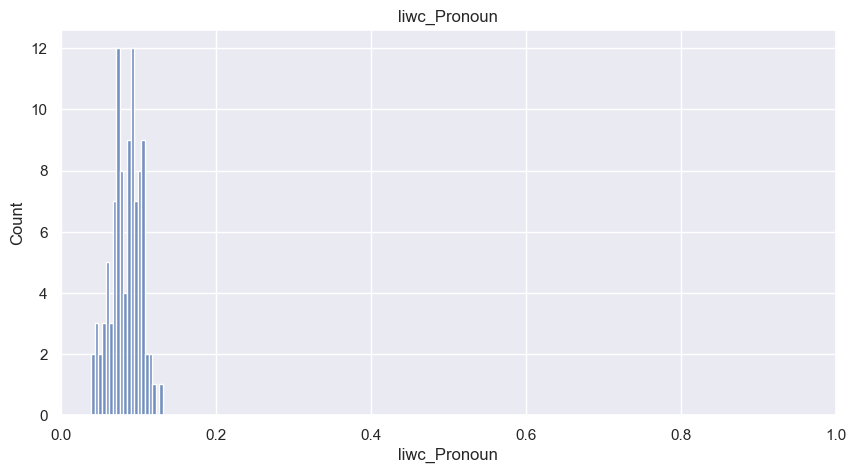

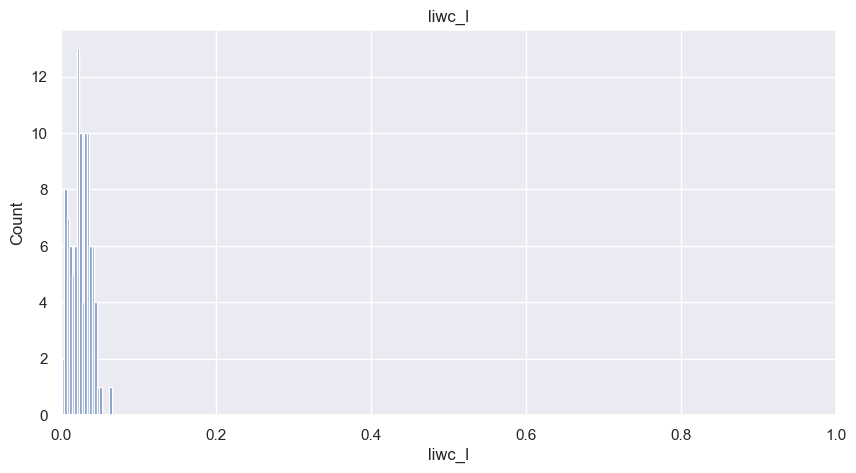

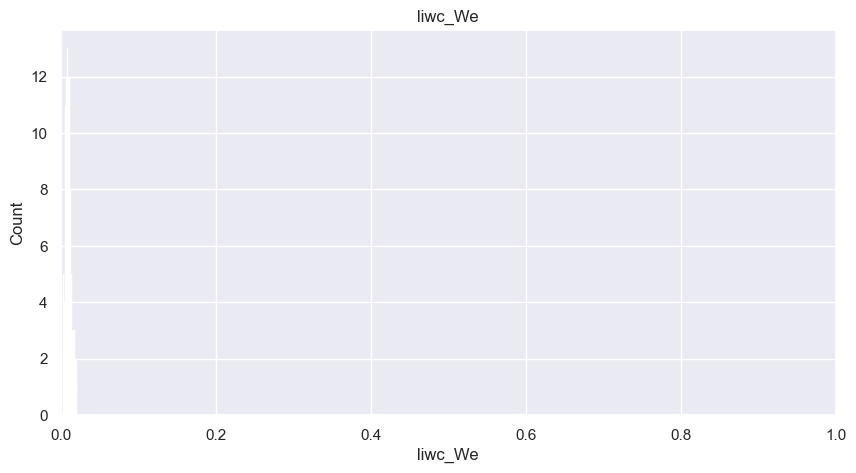

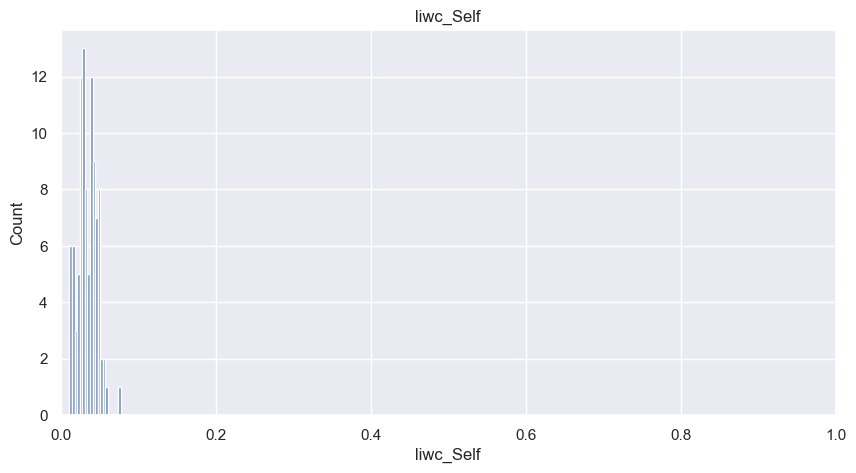

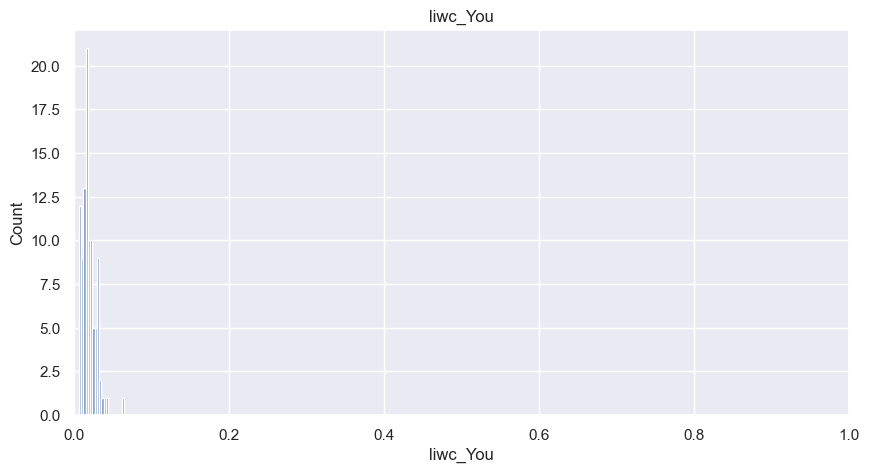

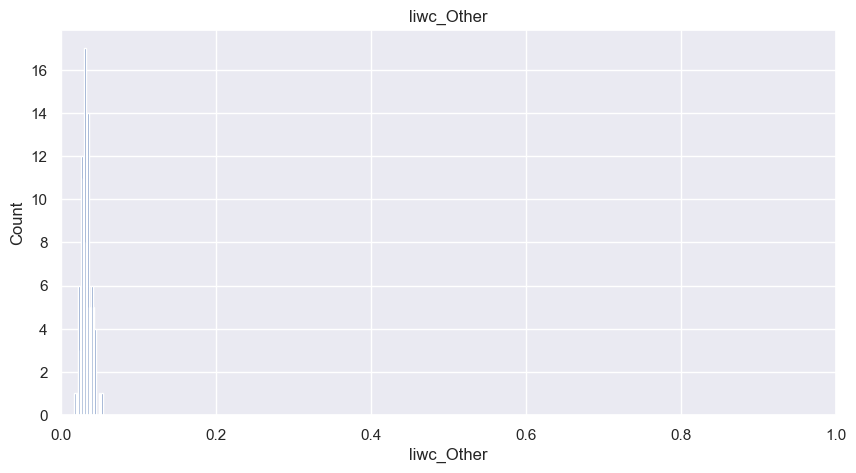

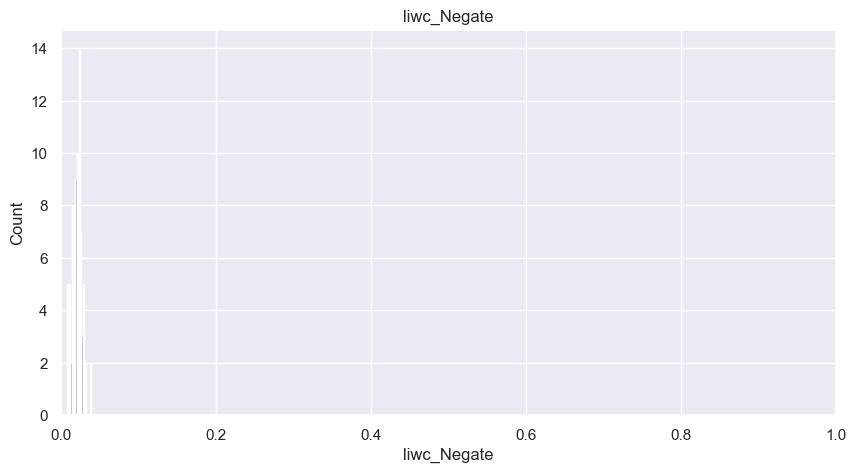

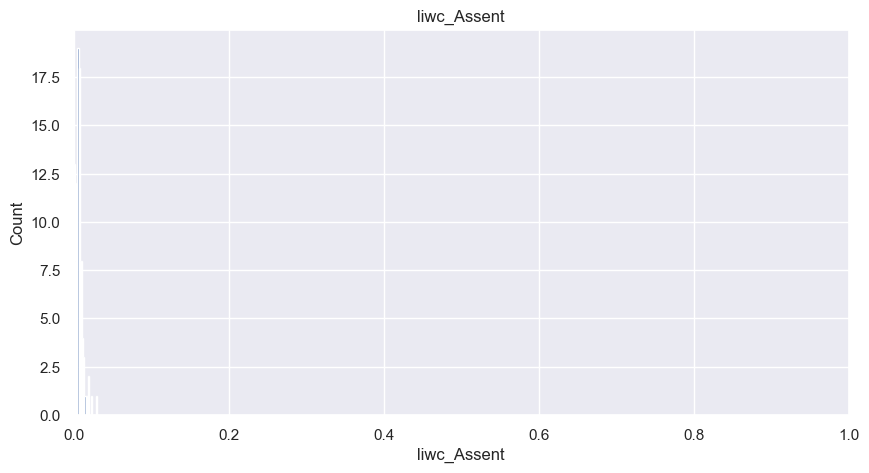

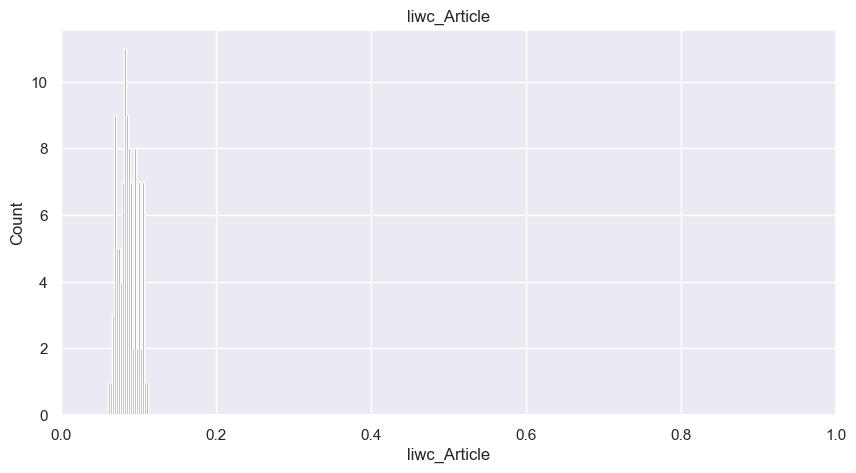

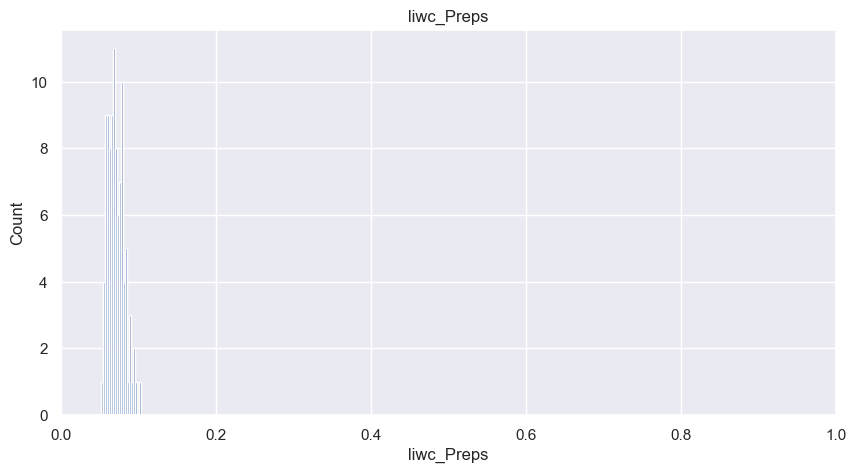

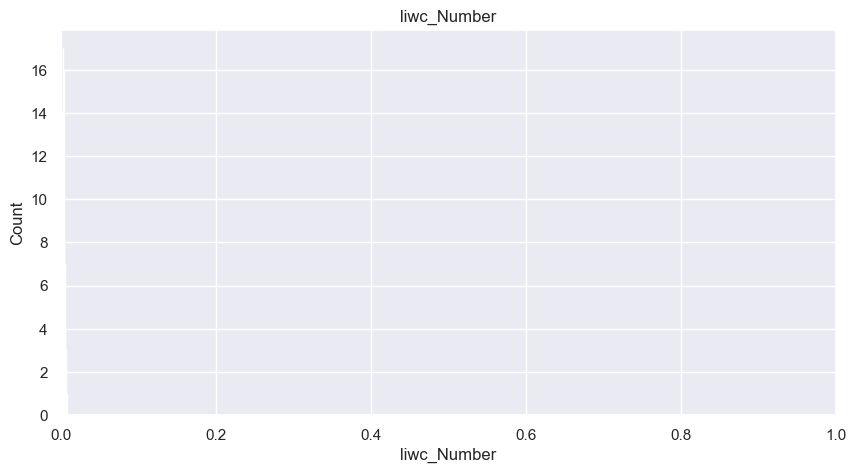

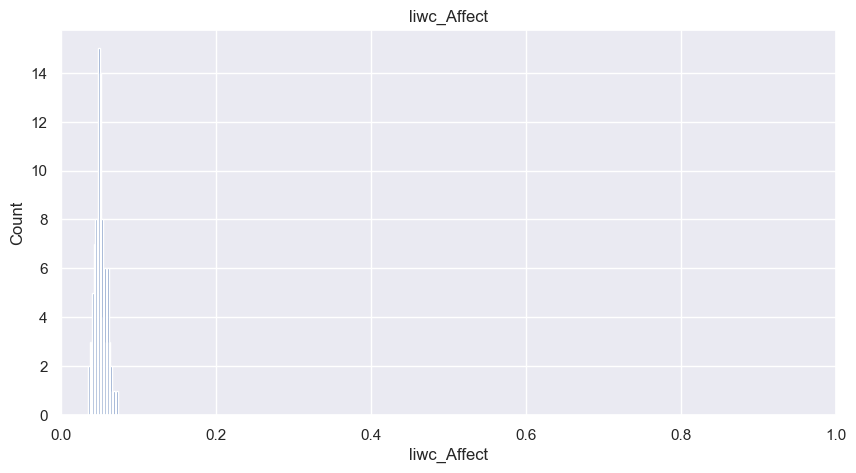

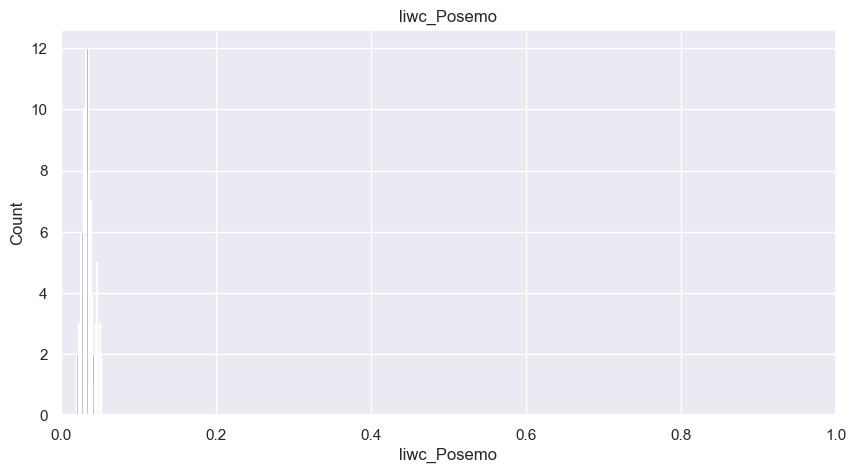

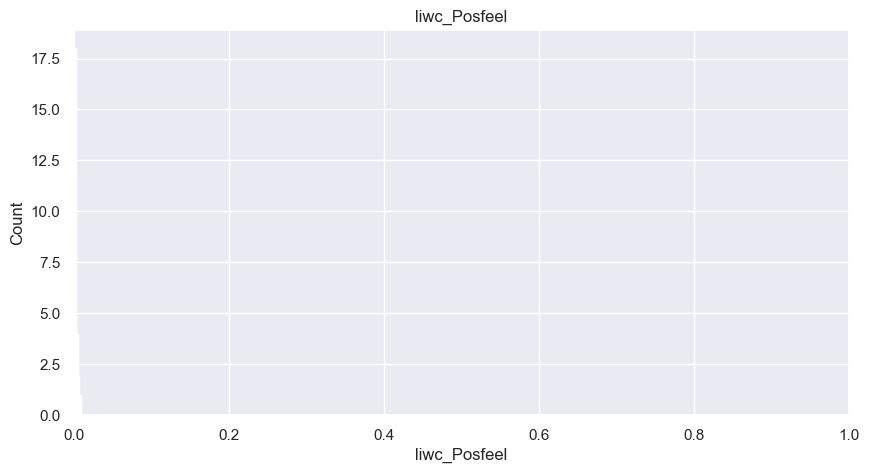

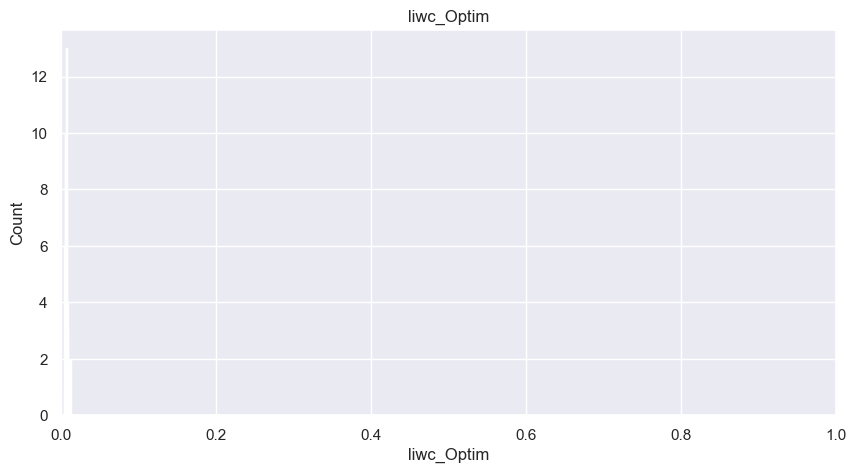

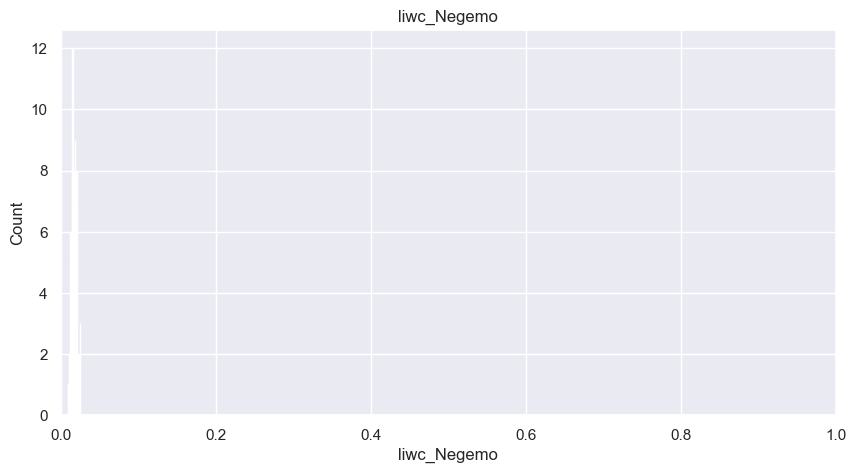

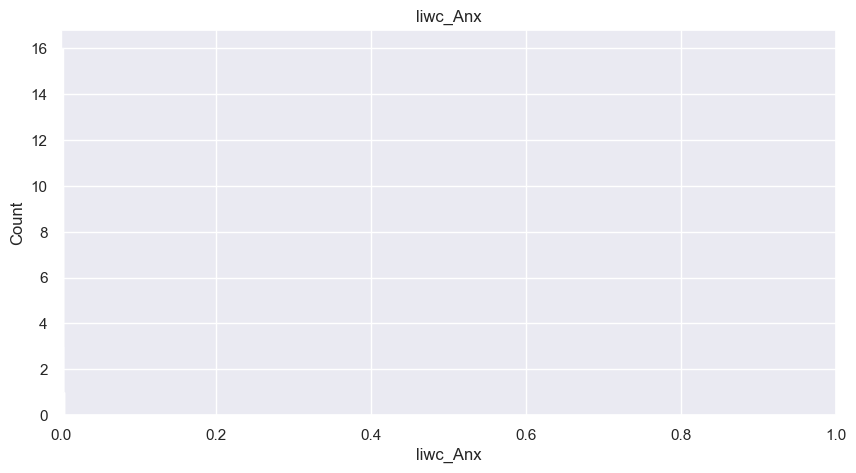

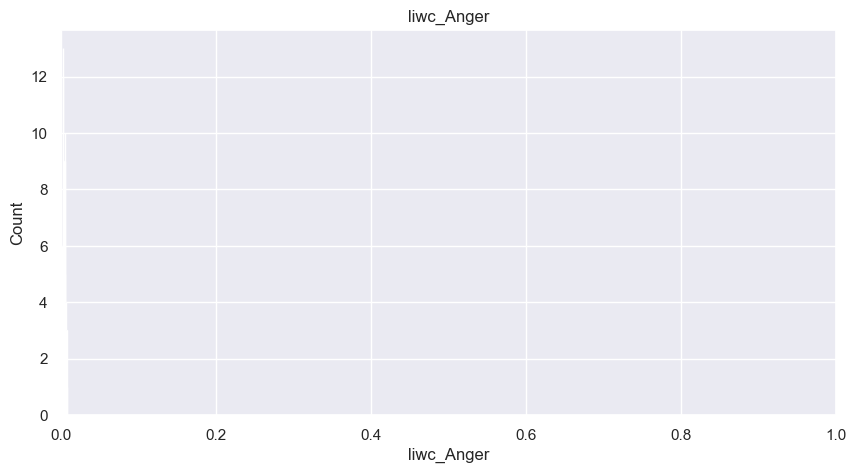

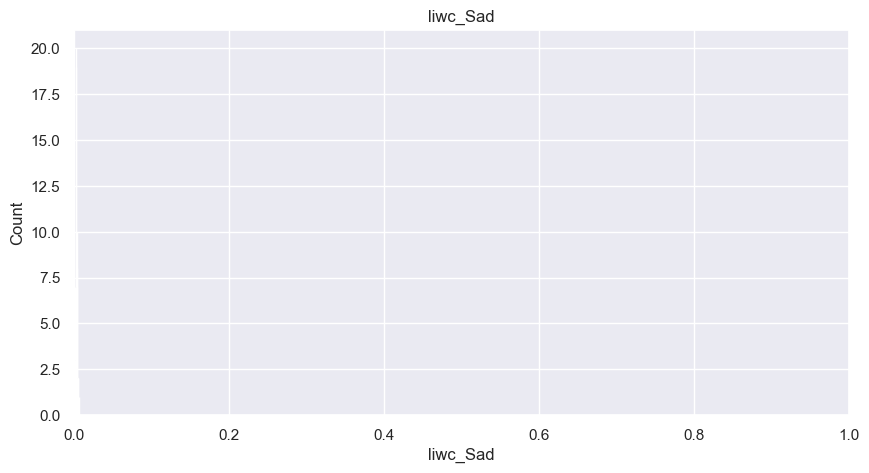

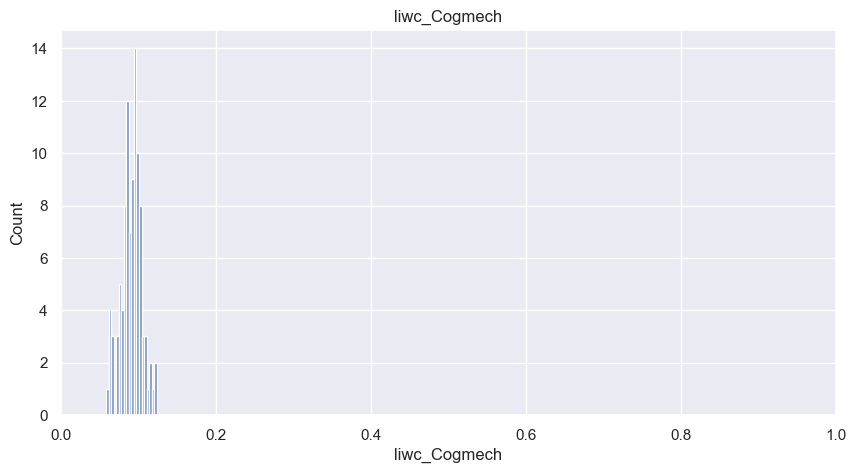

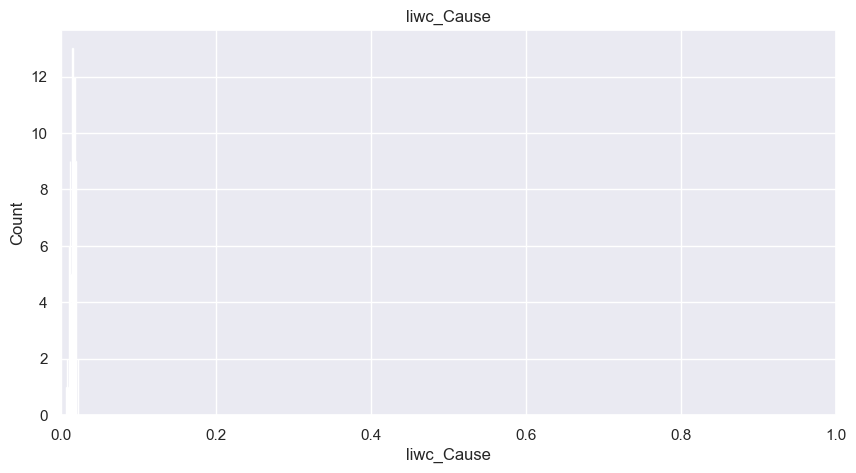

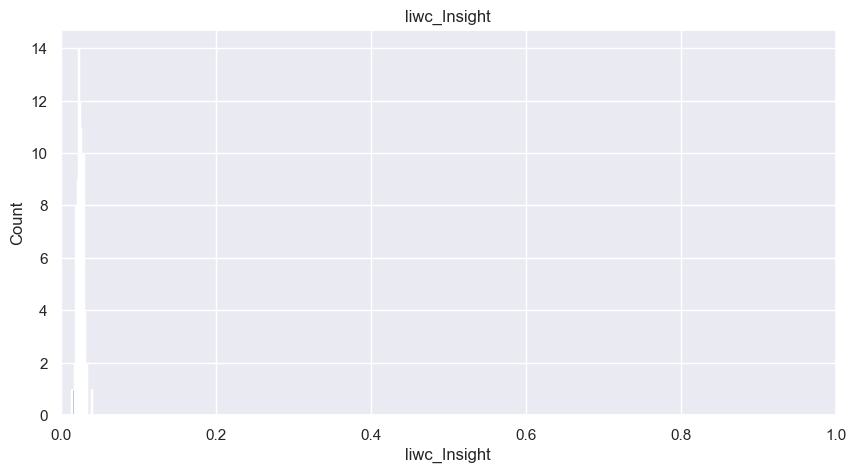

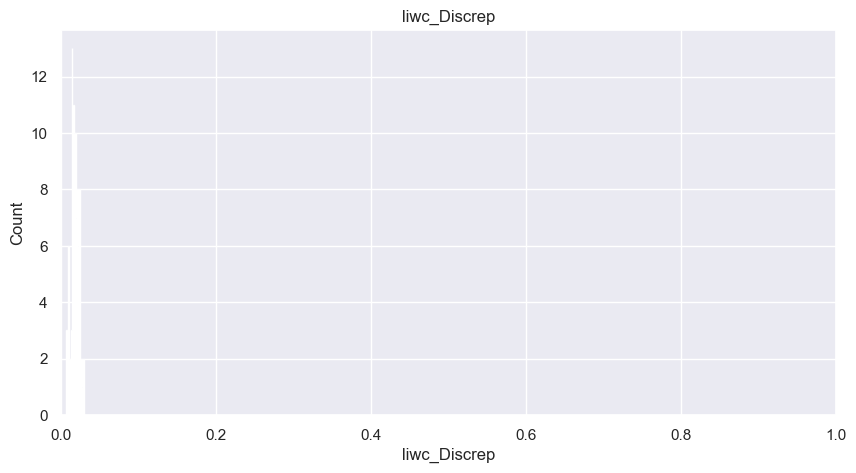

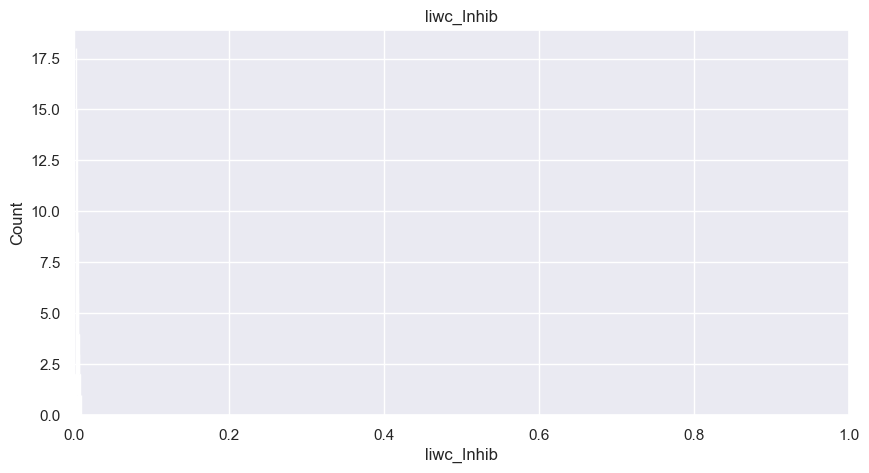

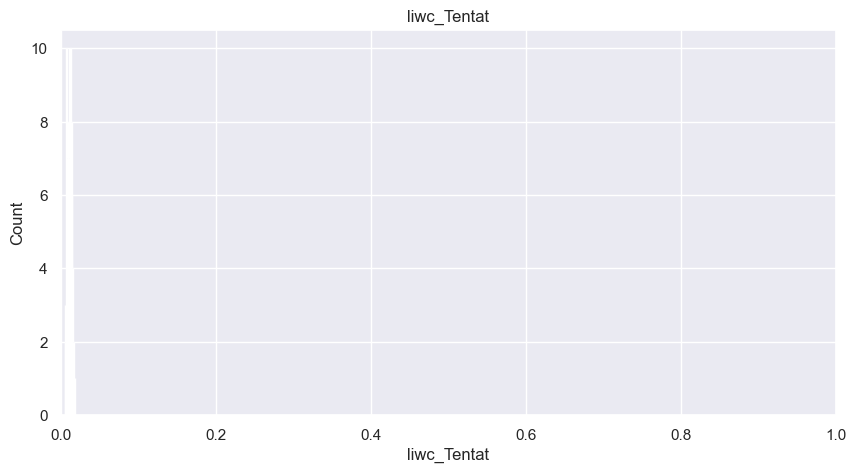

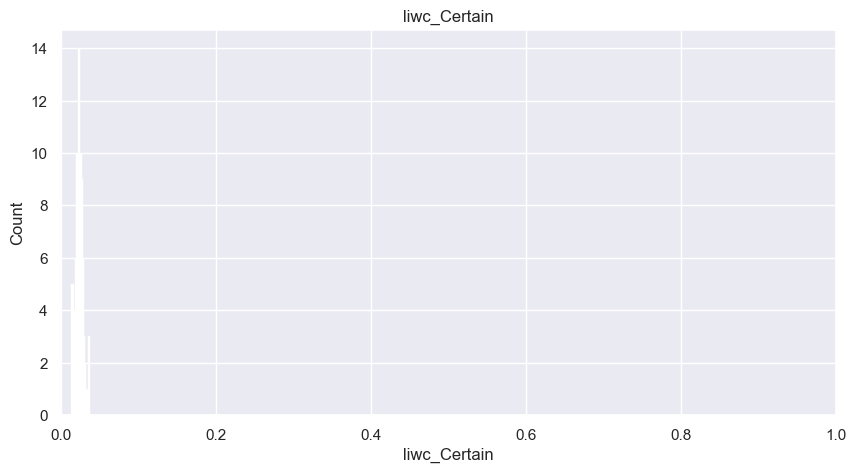

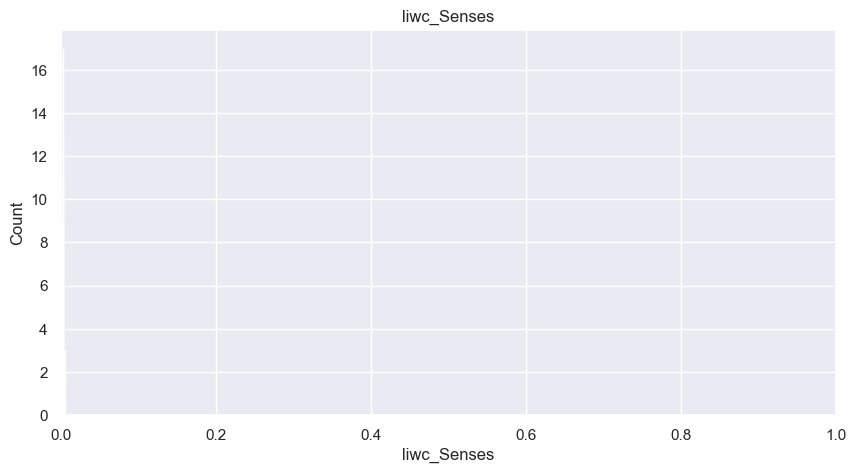

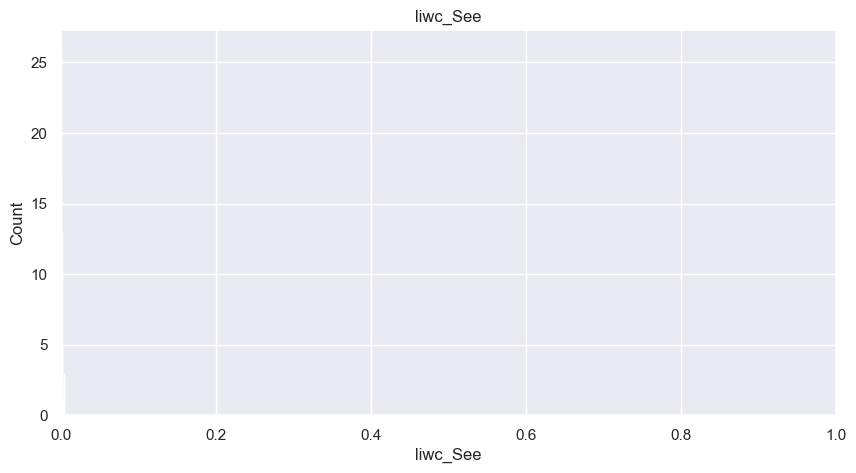

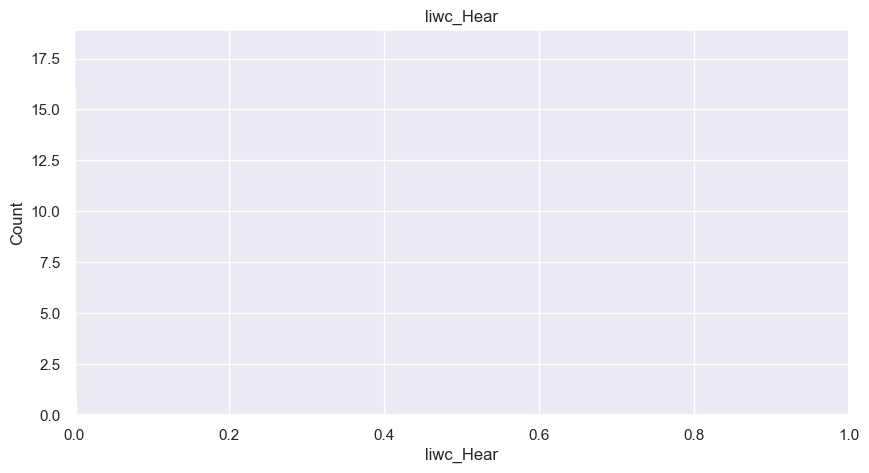

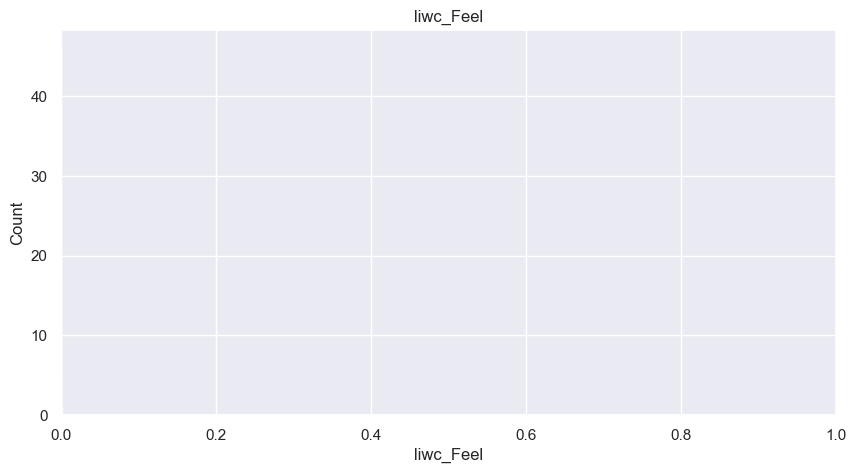

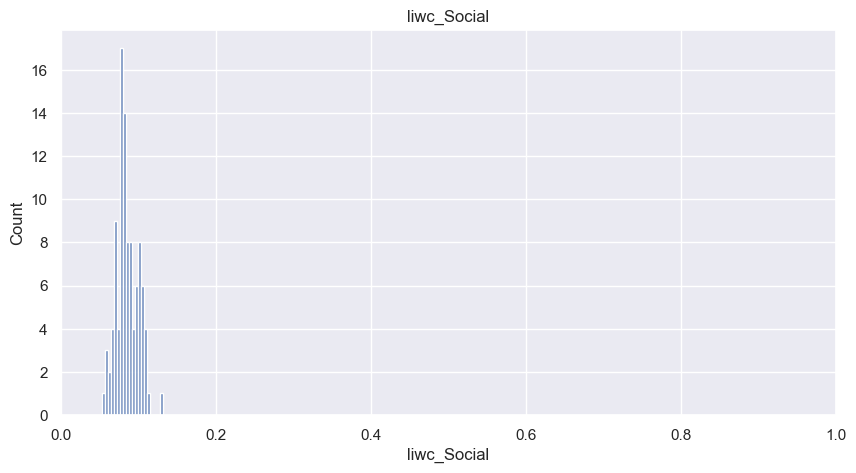

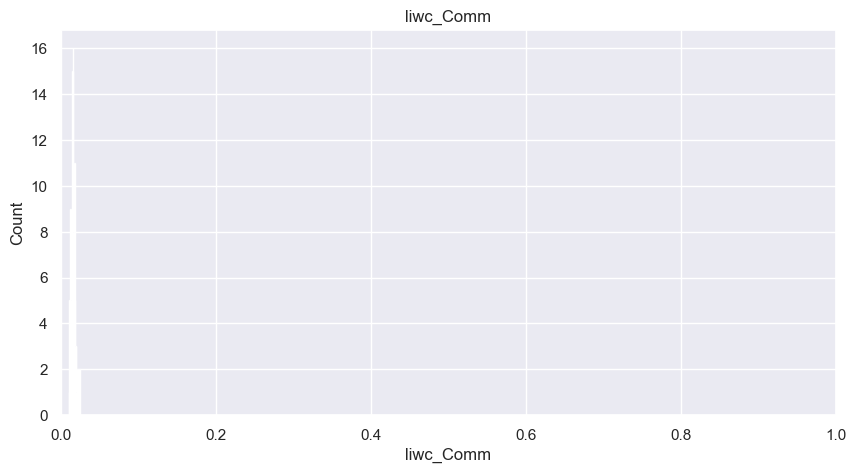

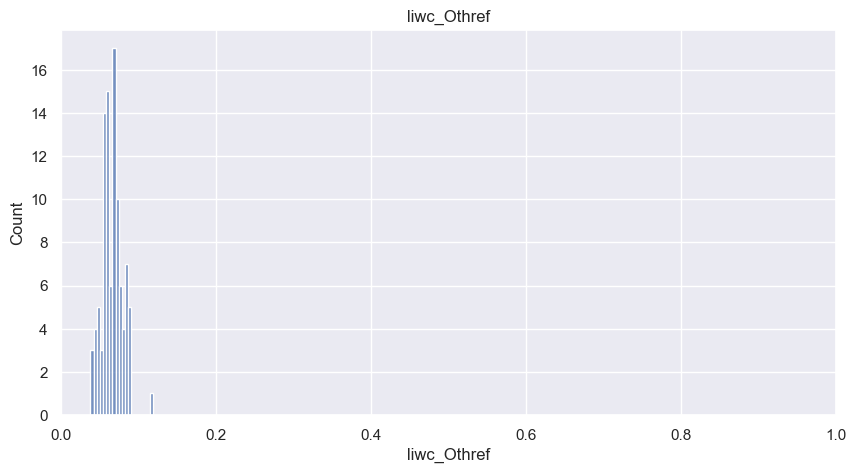

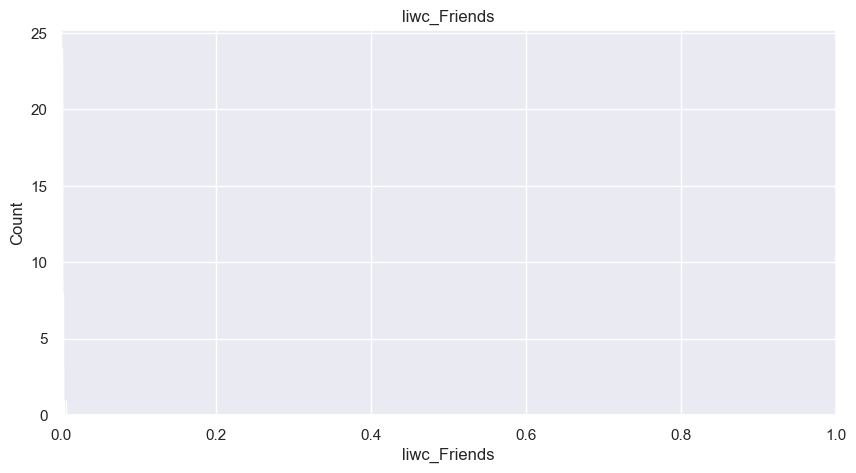

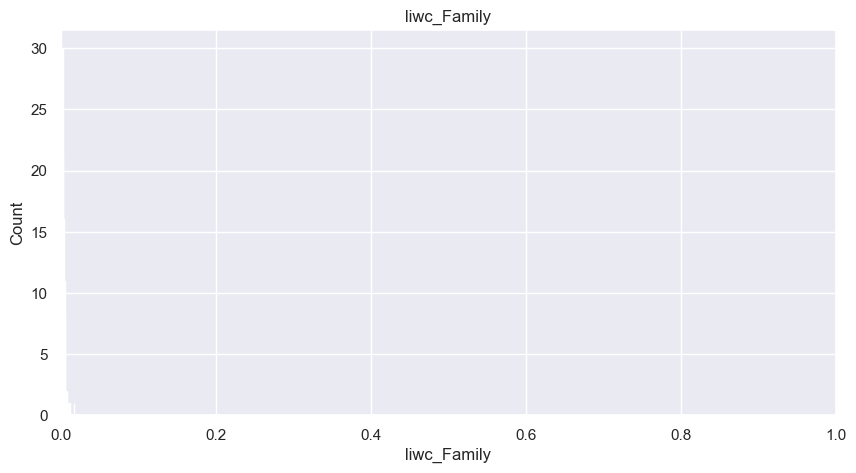

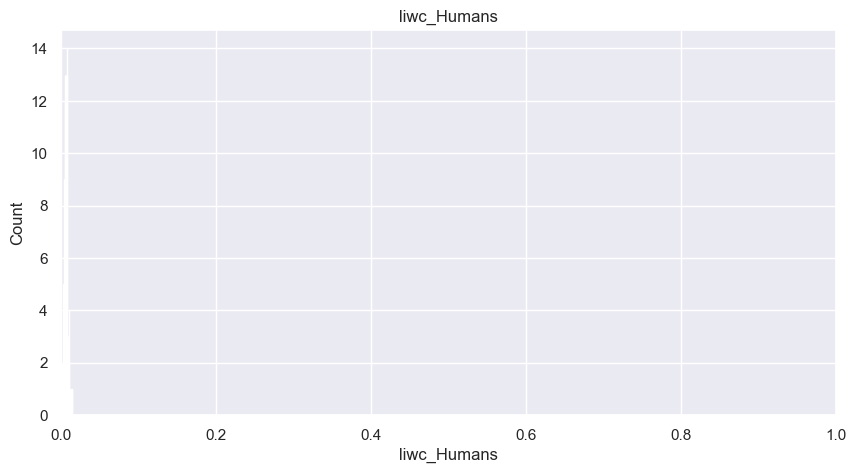

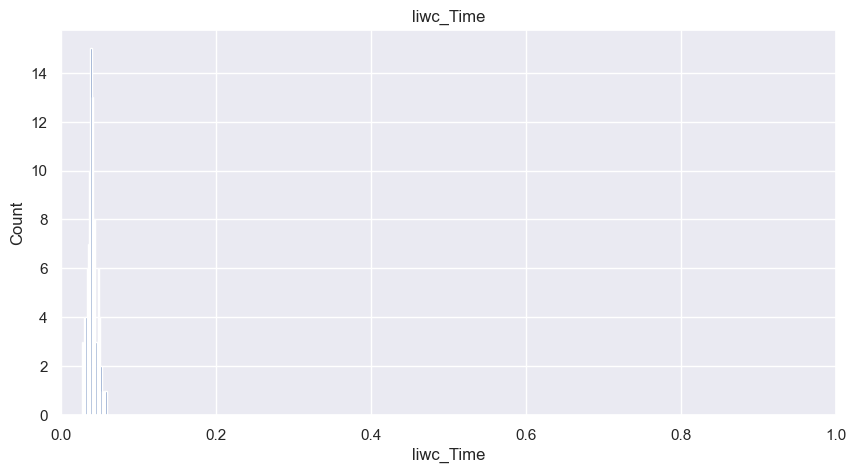

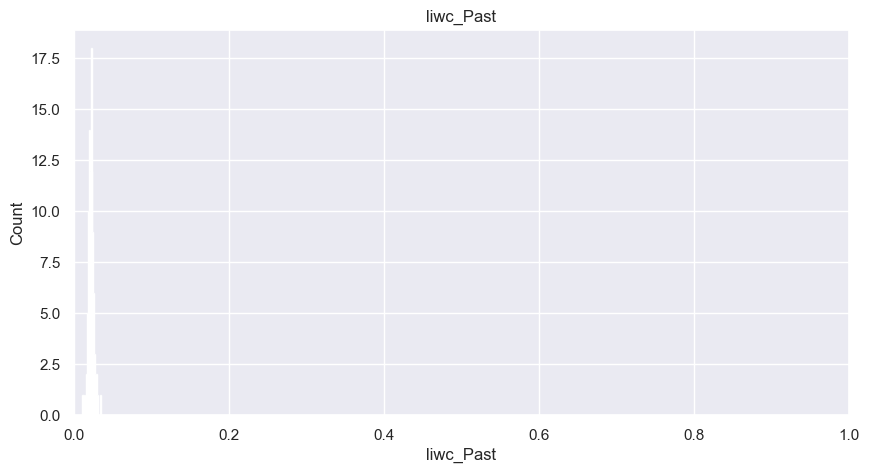

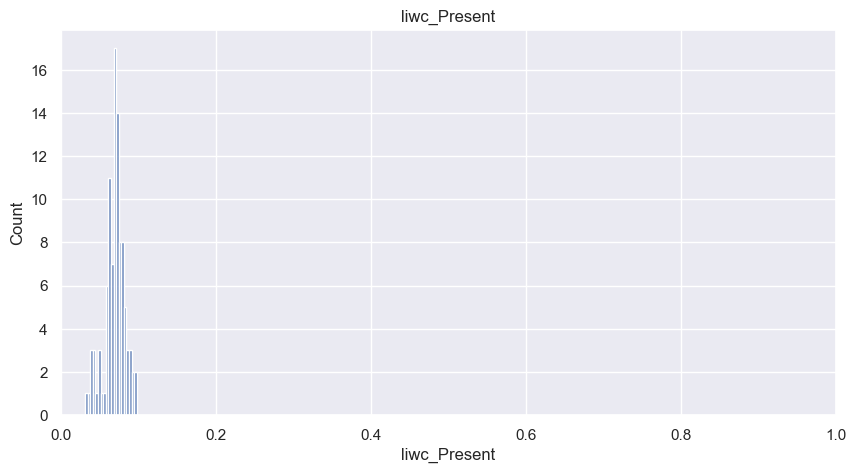

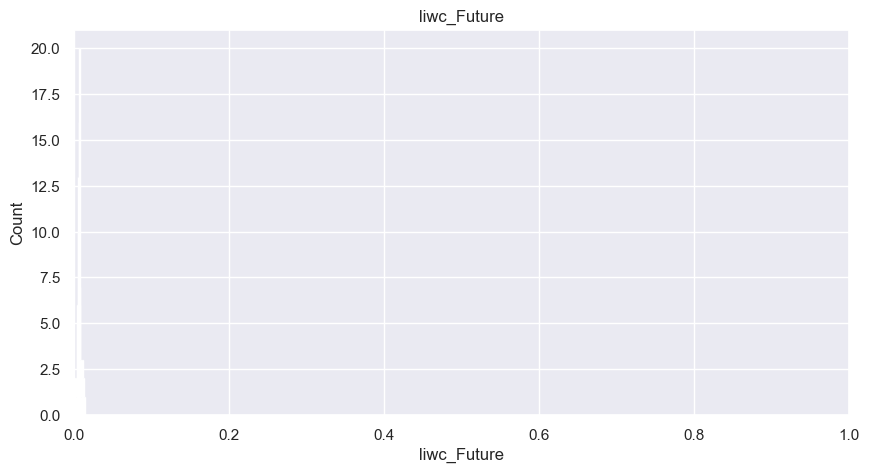

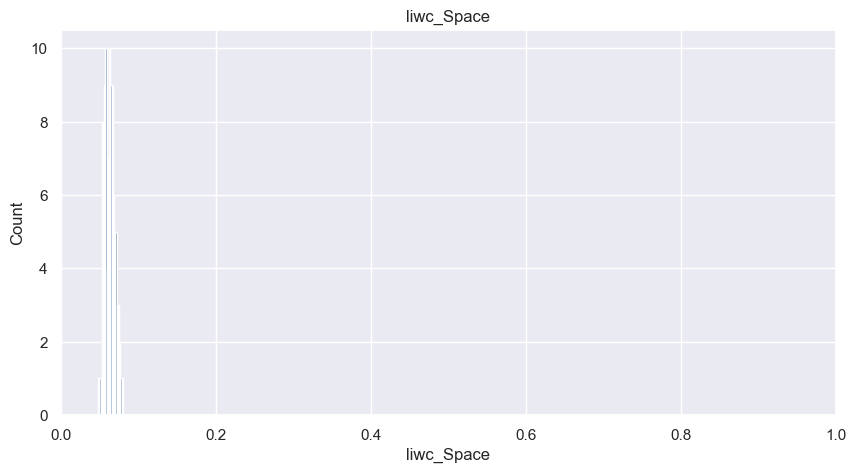

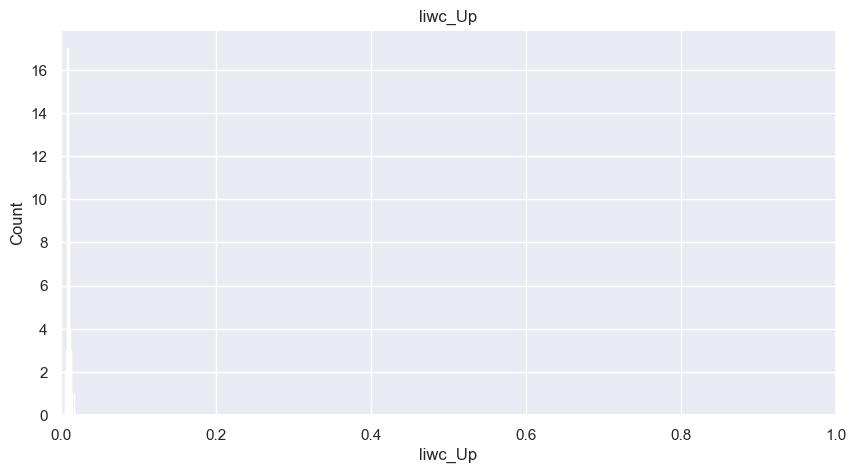

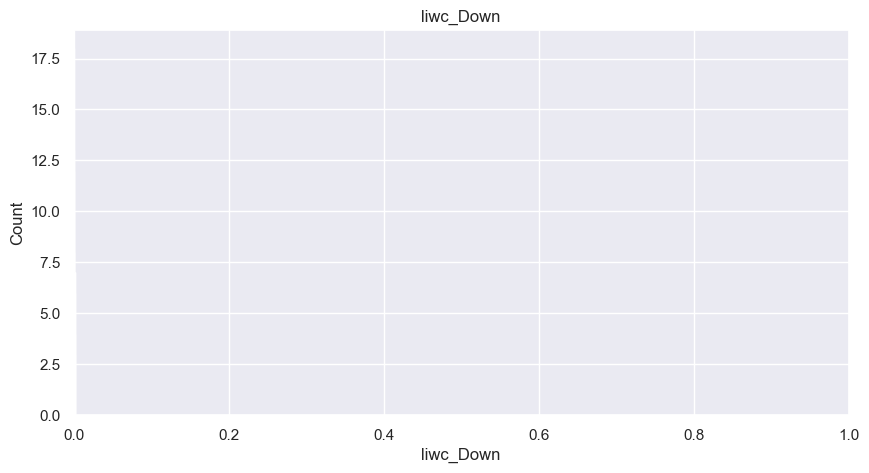

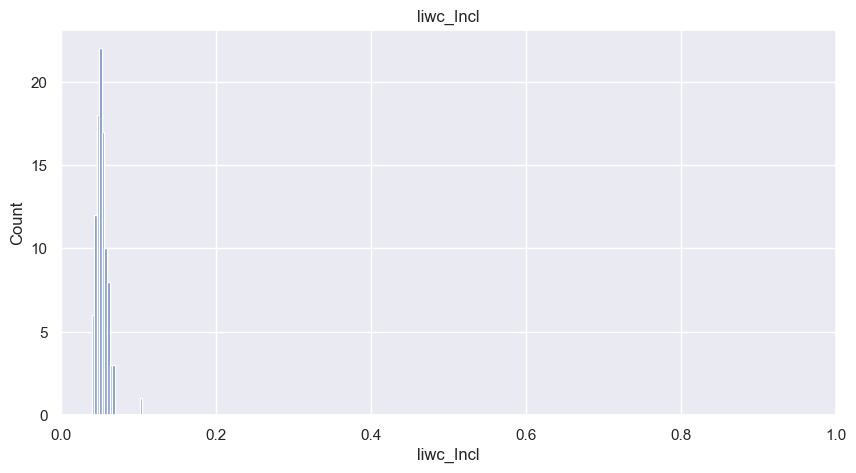

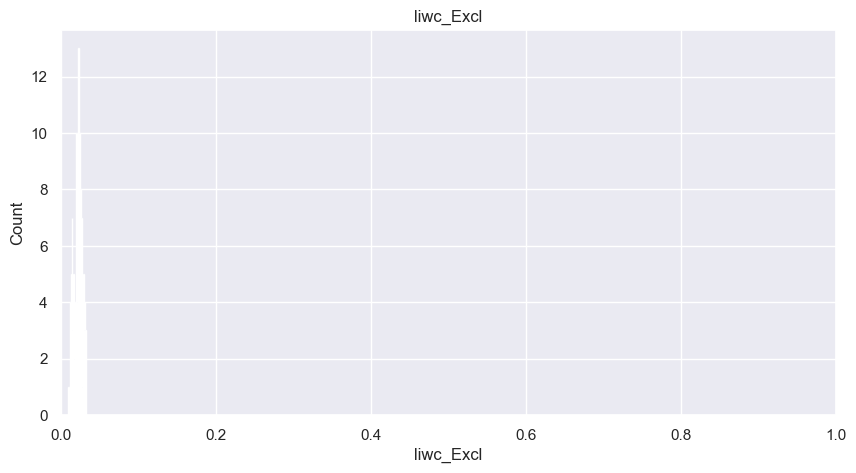

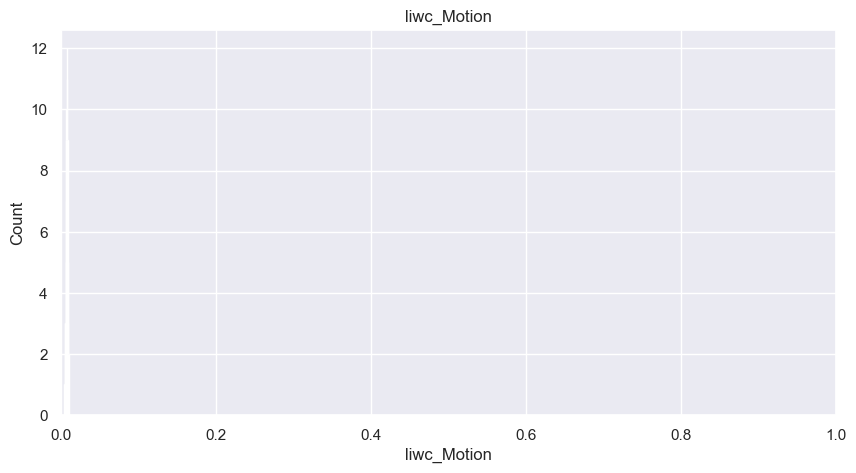

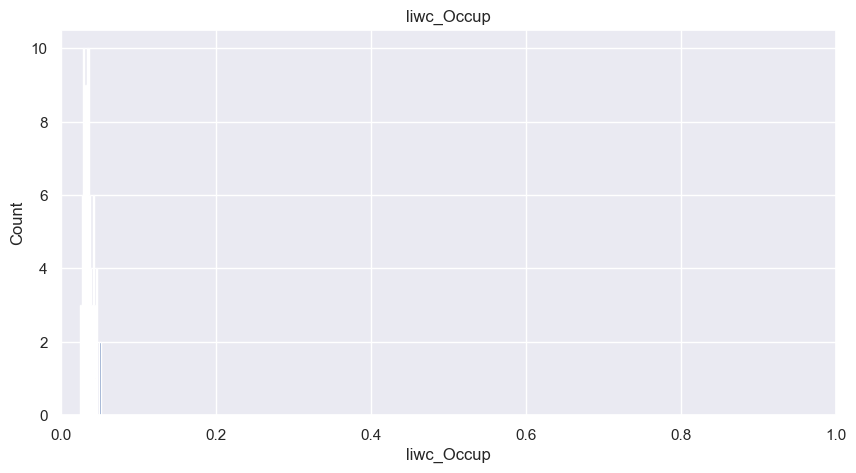

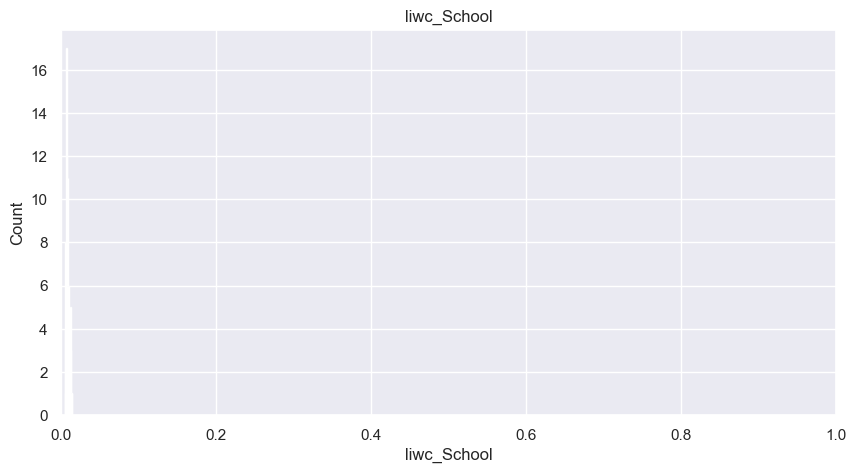

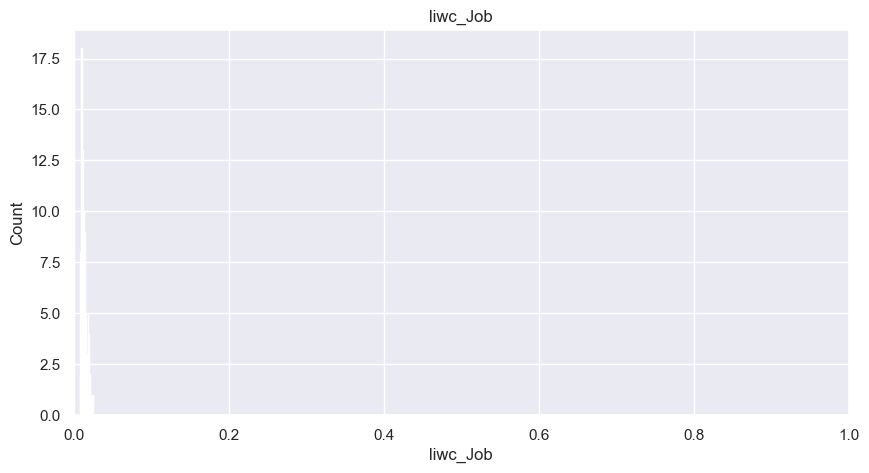

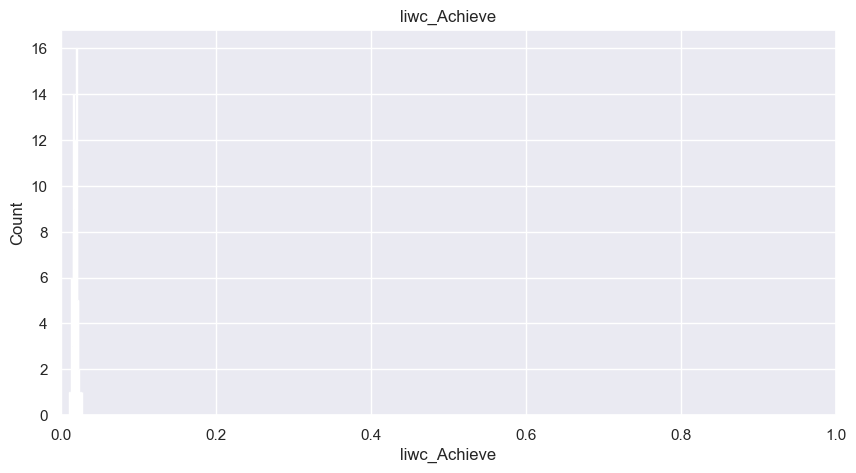

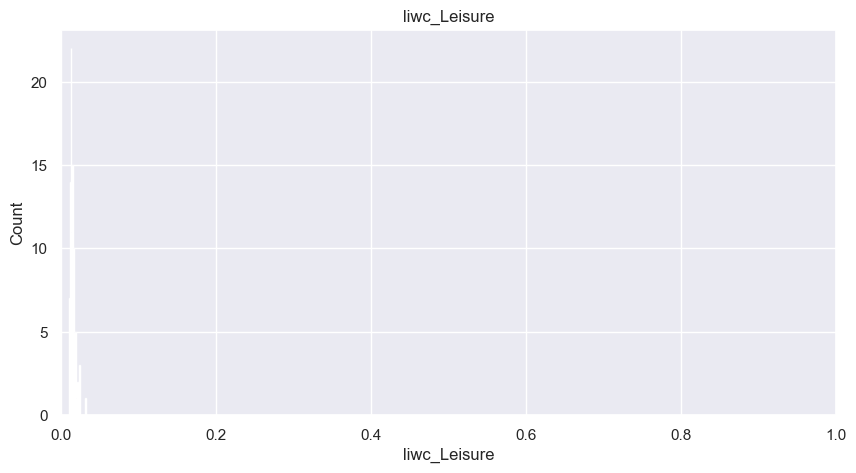

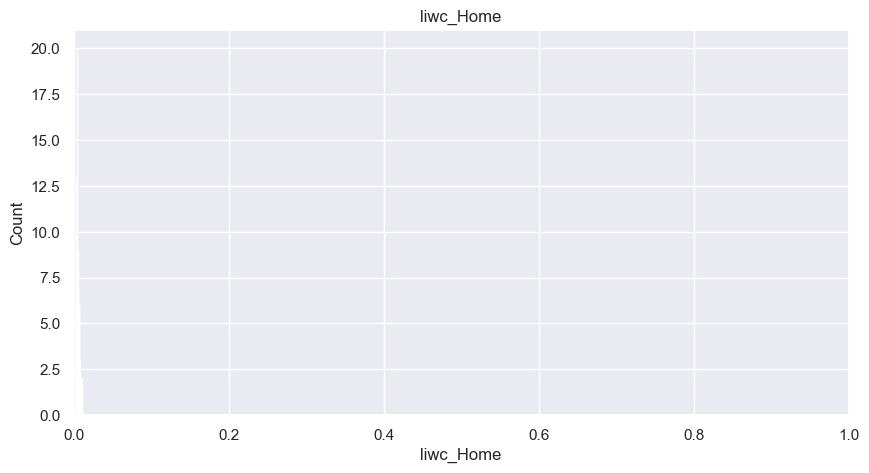

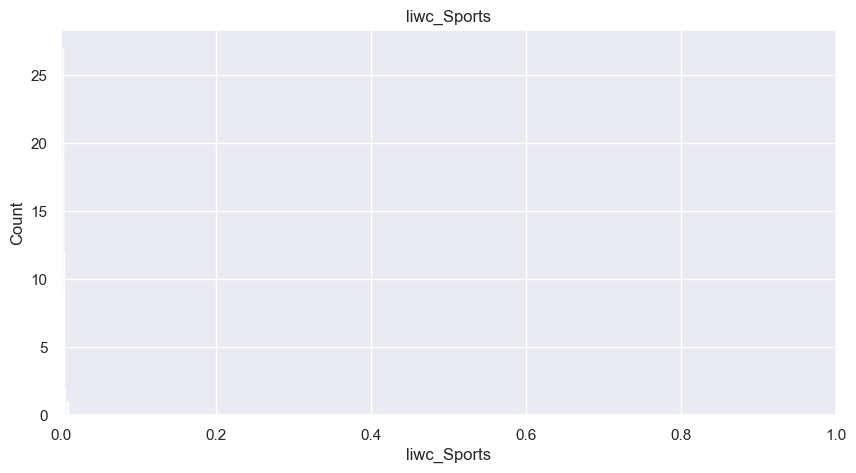

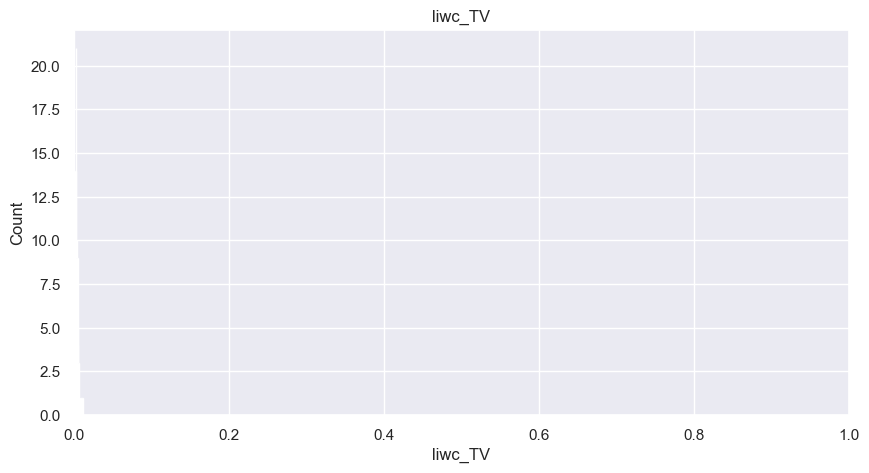

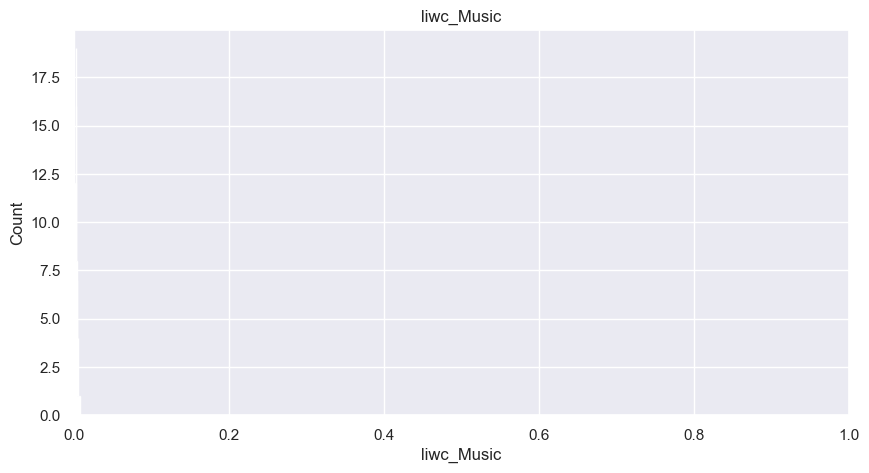

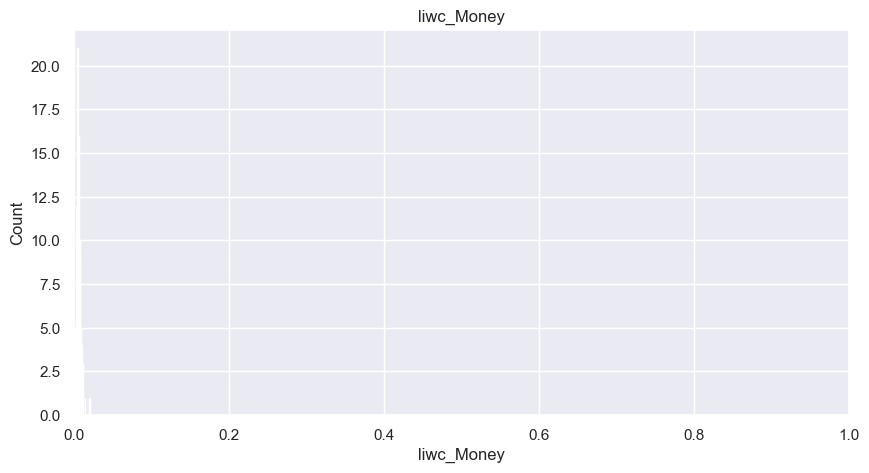

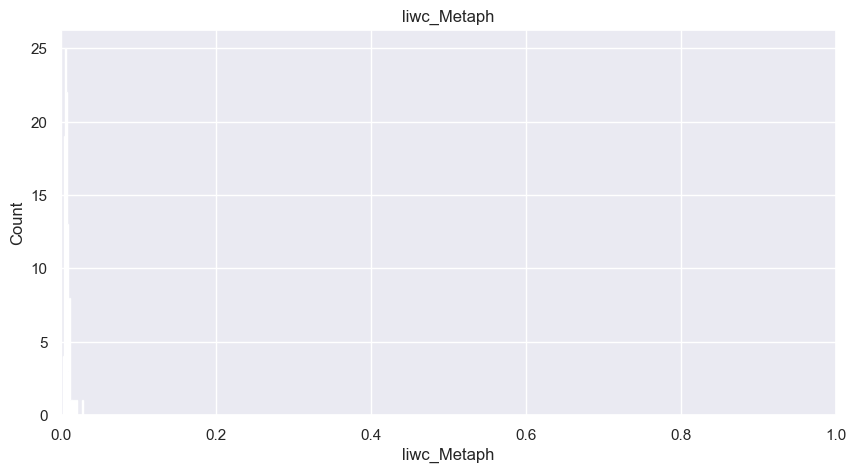

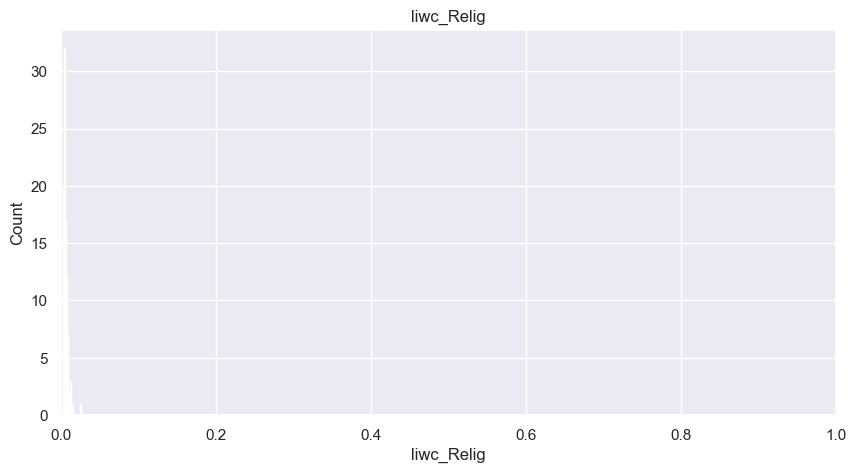

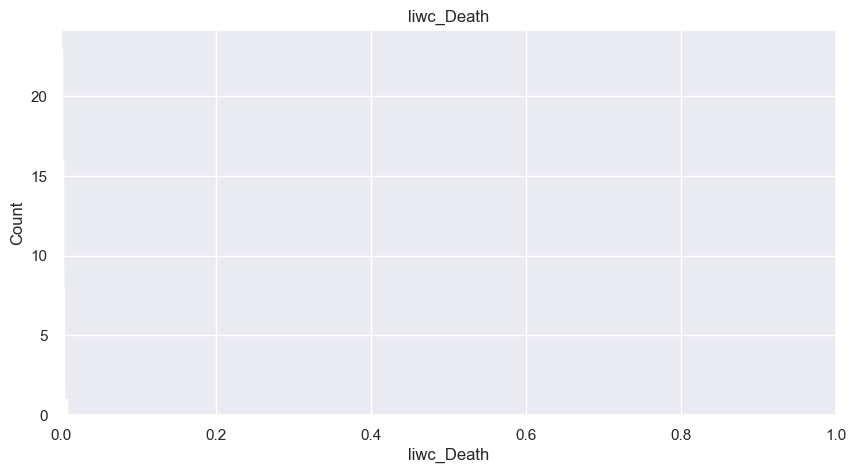

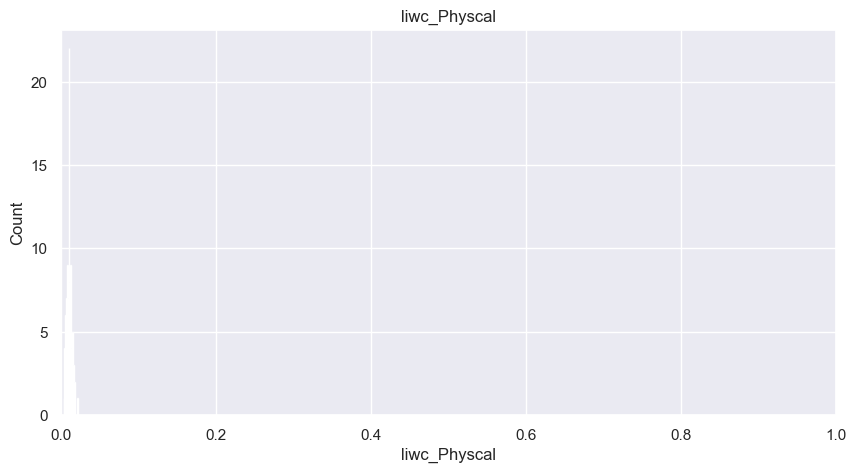

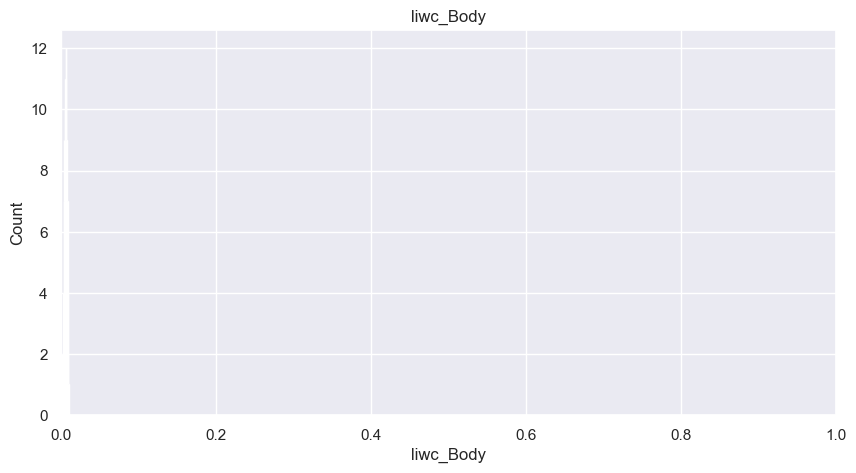

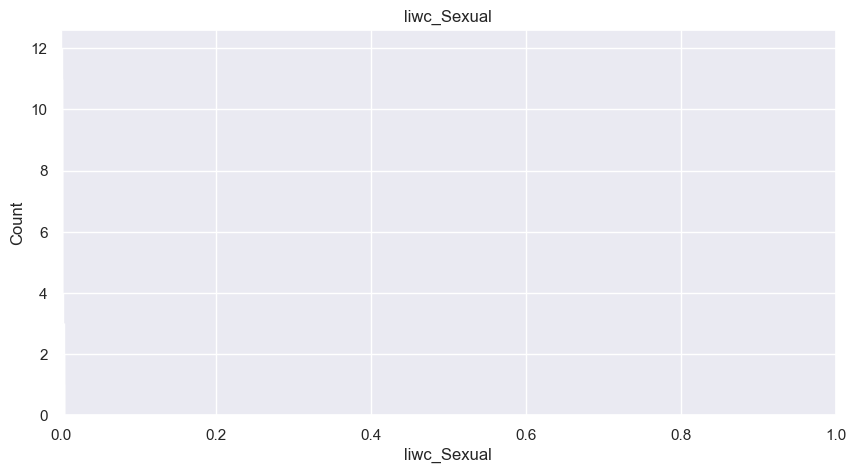

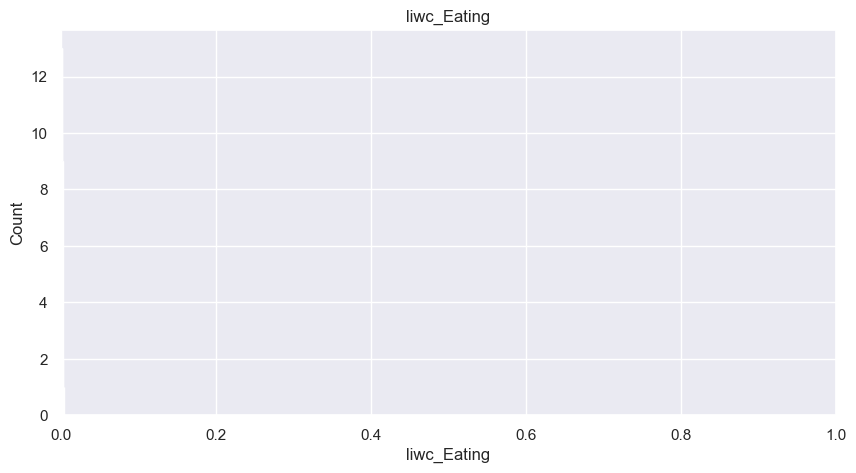

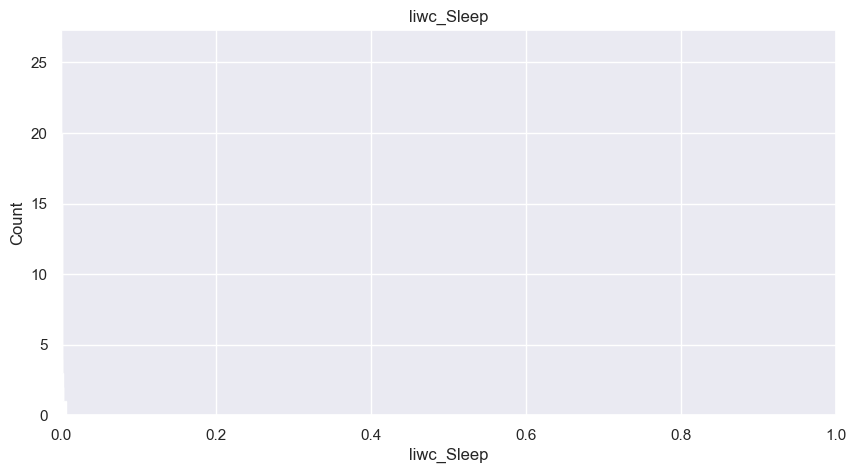

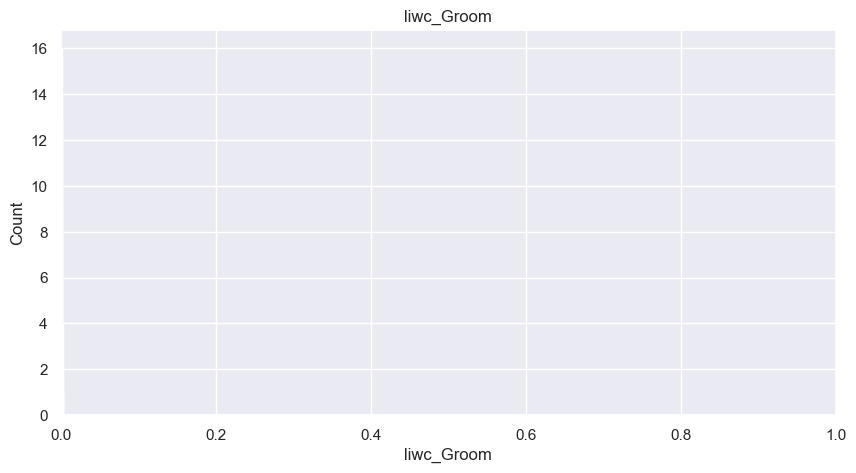

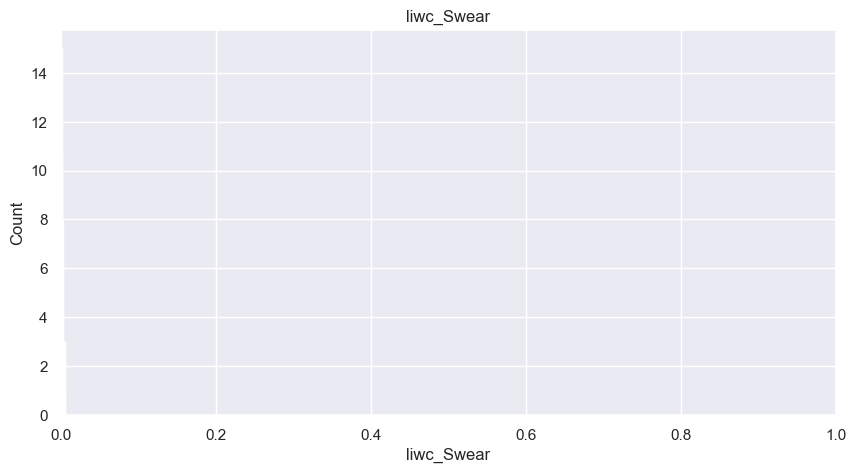

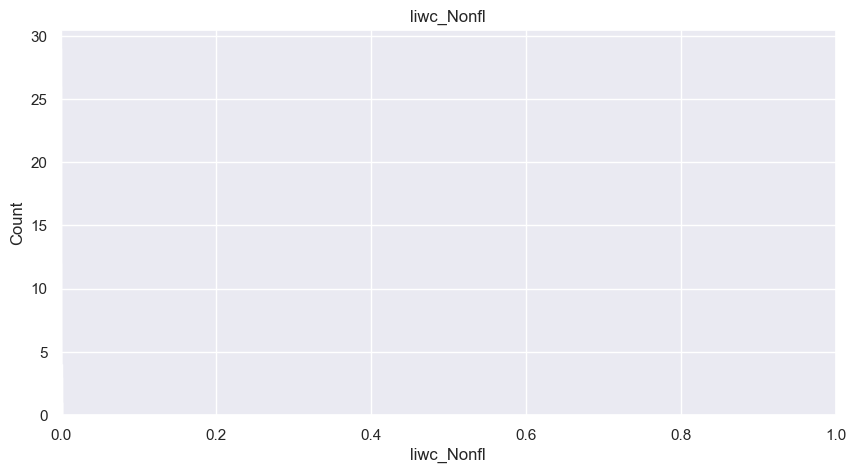

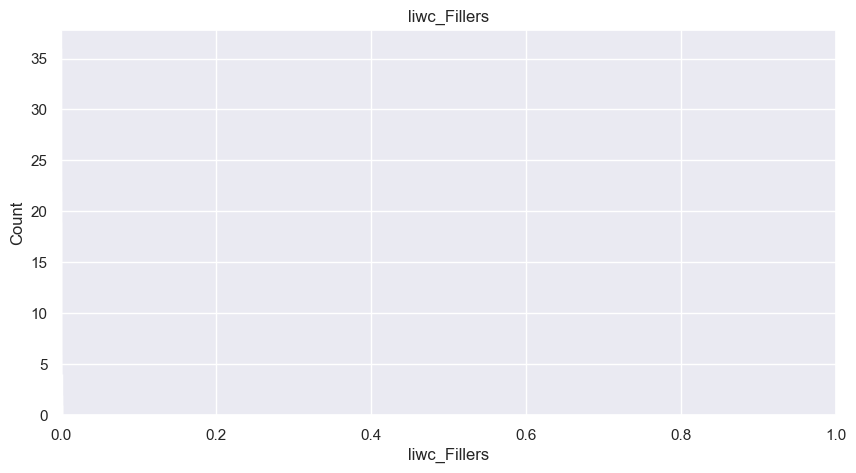

In [17]:
#histplot for distribution of all liwc categories
sns.set(rc={'figure.figsize':(10, 5)})
liwc_cols = liwc.columns[1:]
for col in liwc_cols:
    sns.histplot(grouped, x=col, bins = 20)
    plt.xlim(0, 1)
    plt.title(col)
    plt.show()

## Correlation Matrix of all Features

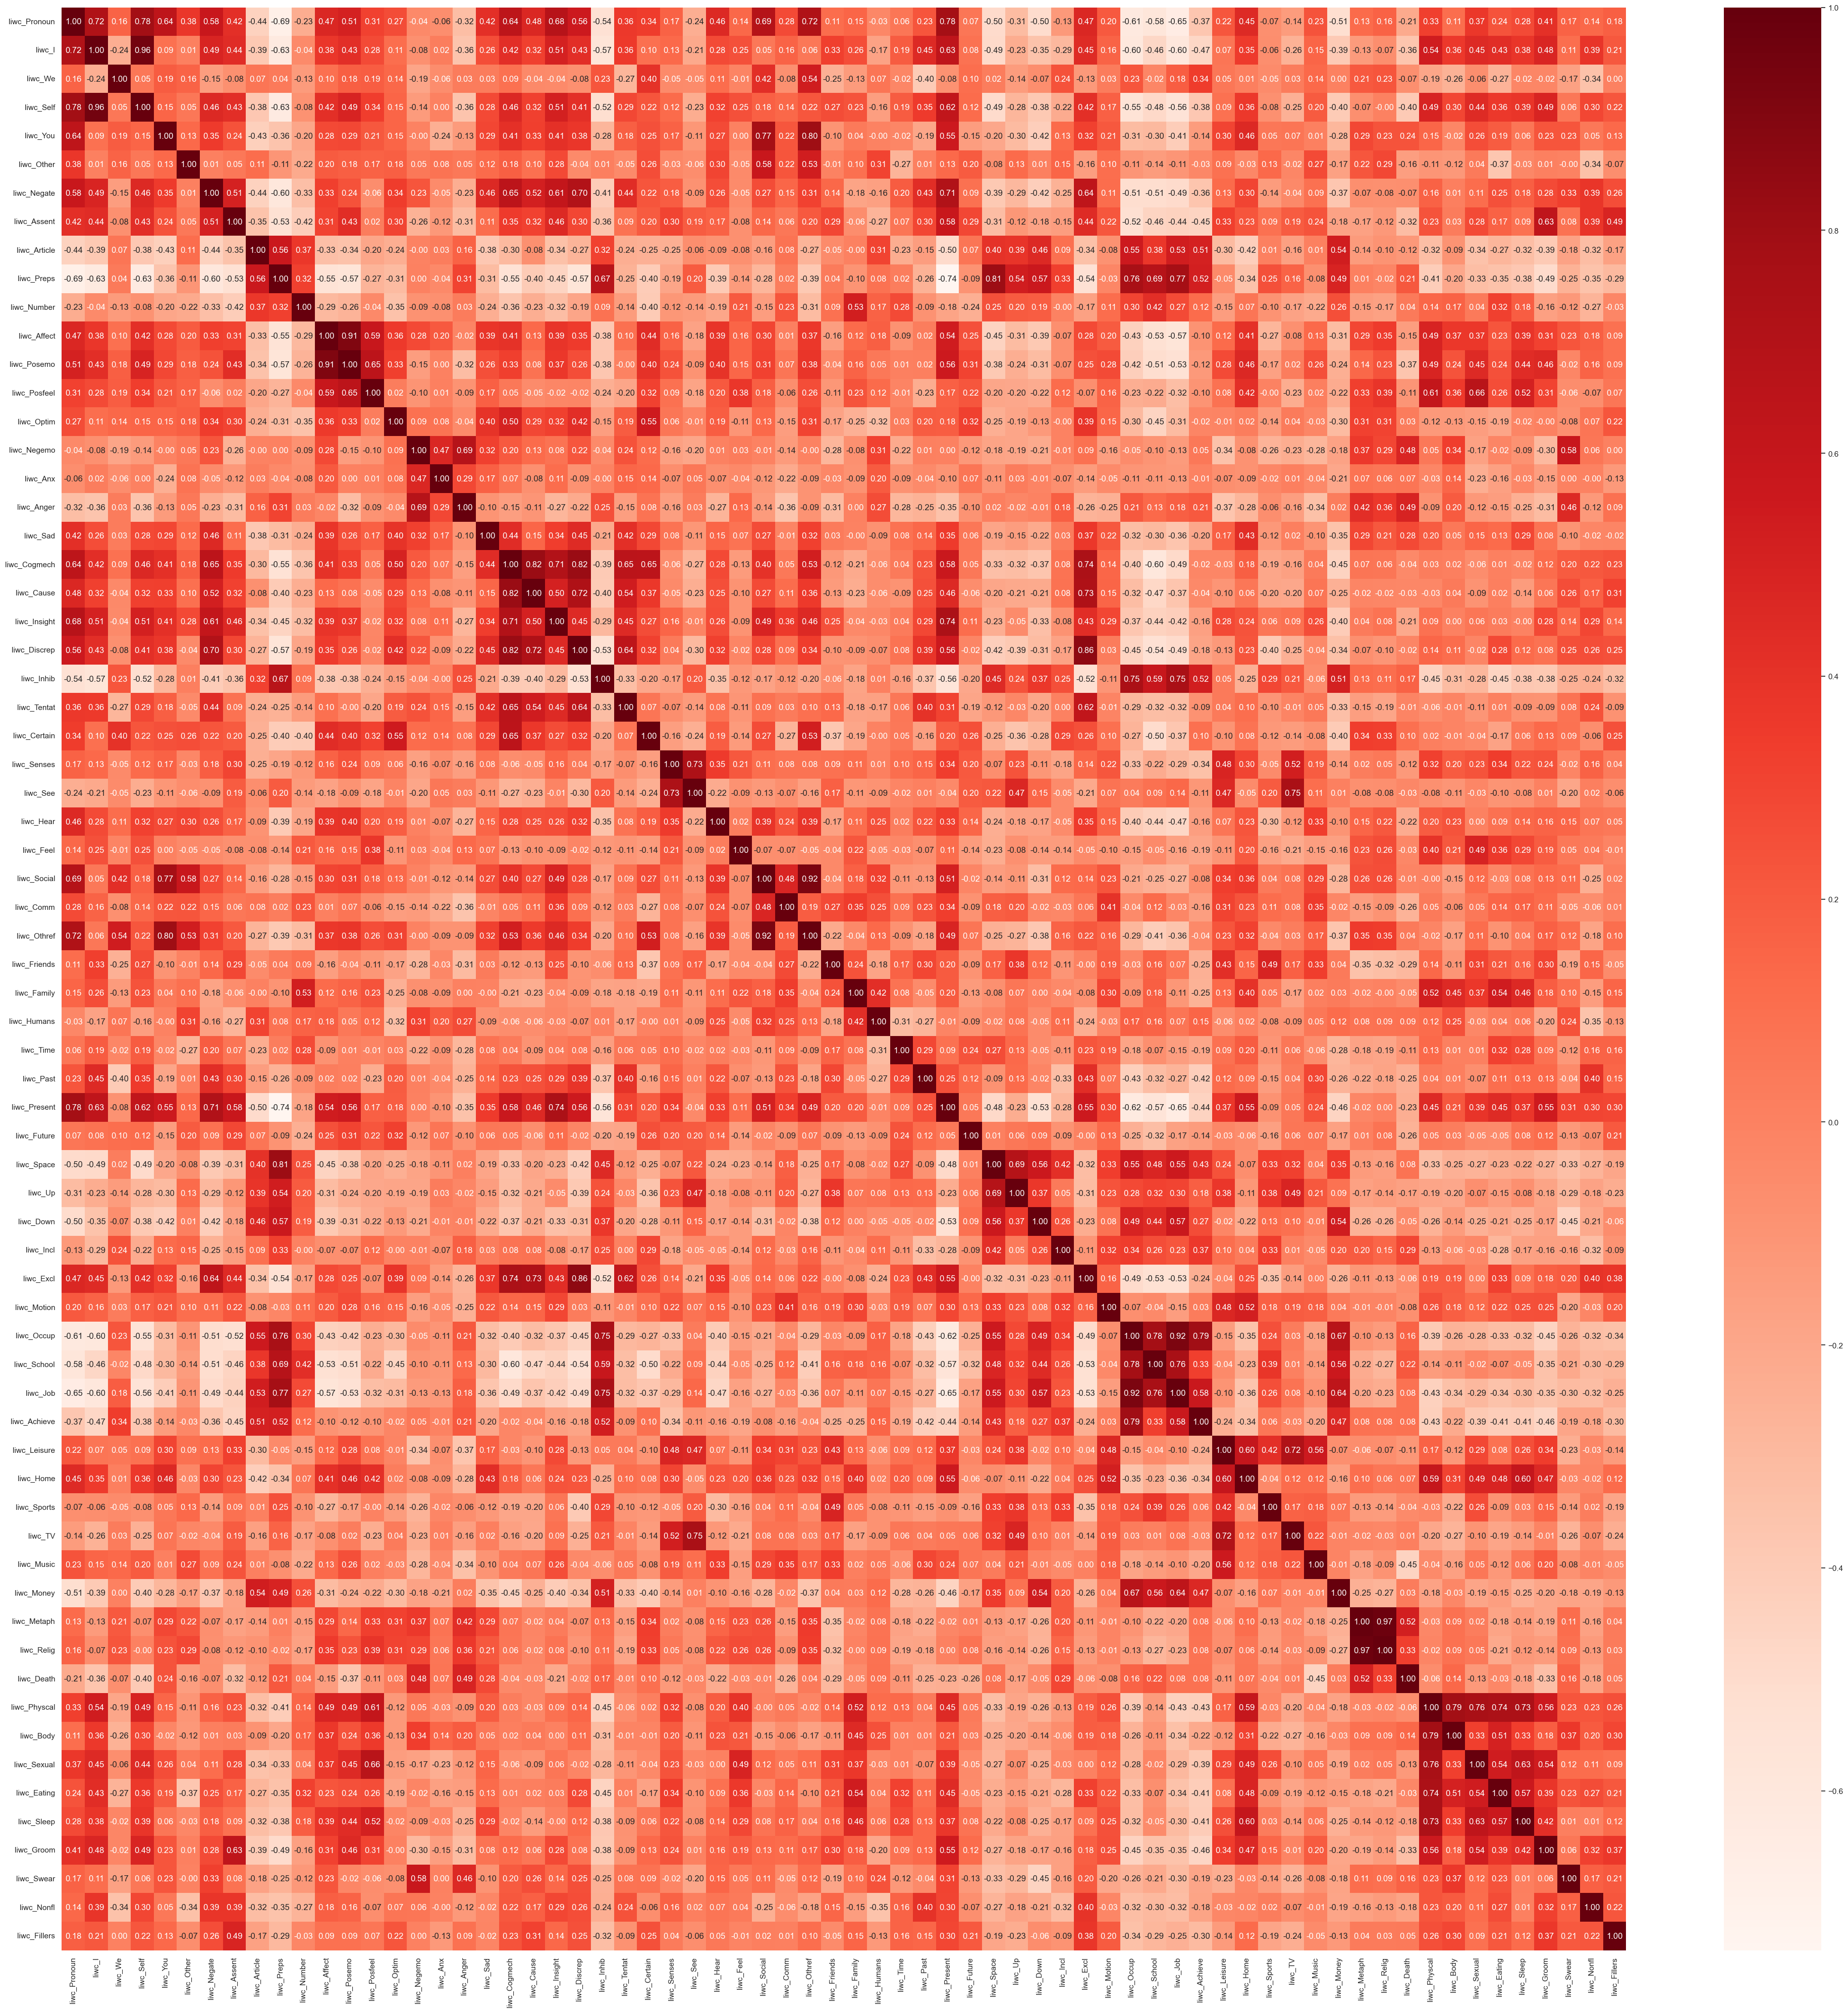

In [14]:
plt.figure(figsize=(50,50))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

## Highly Correlated Features

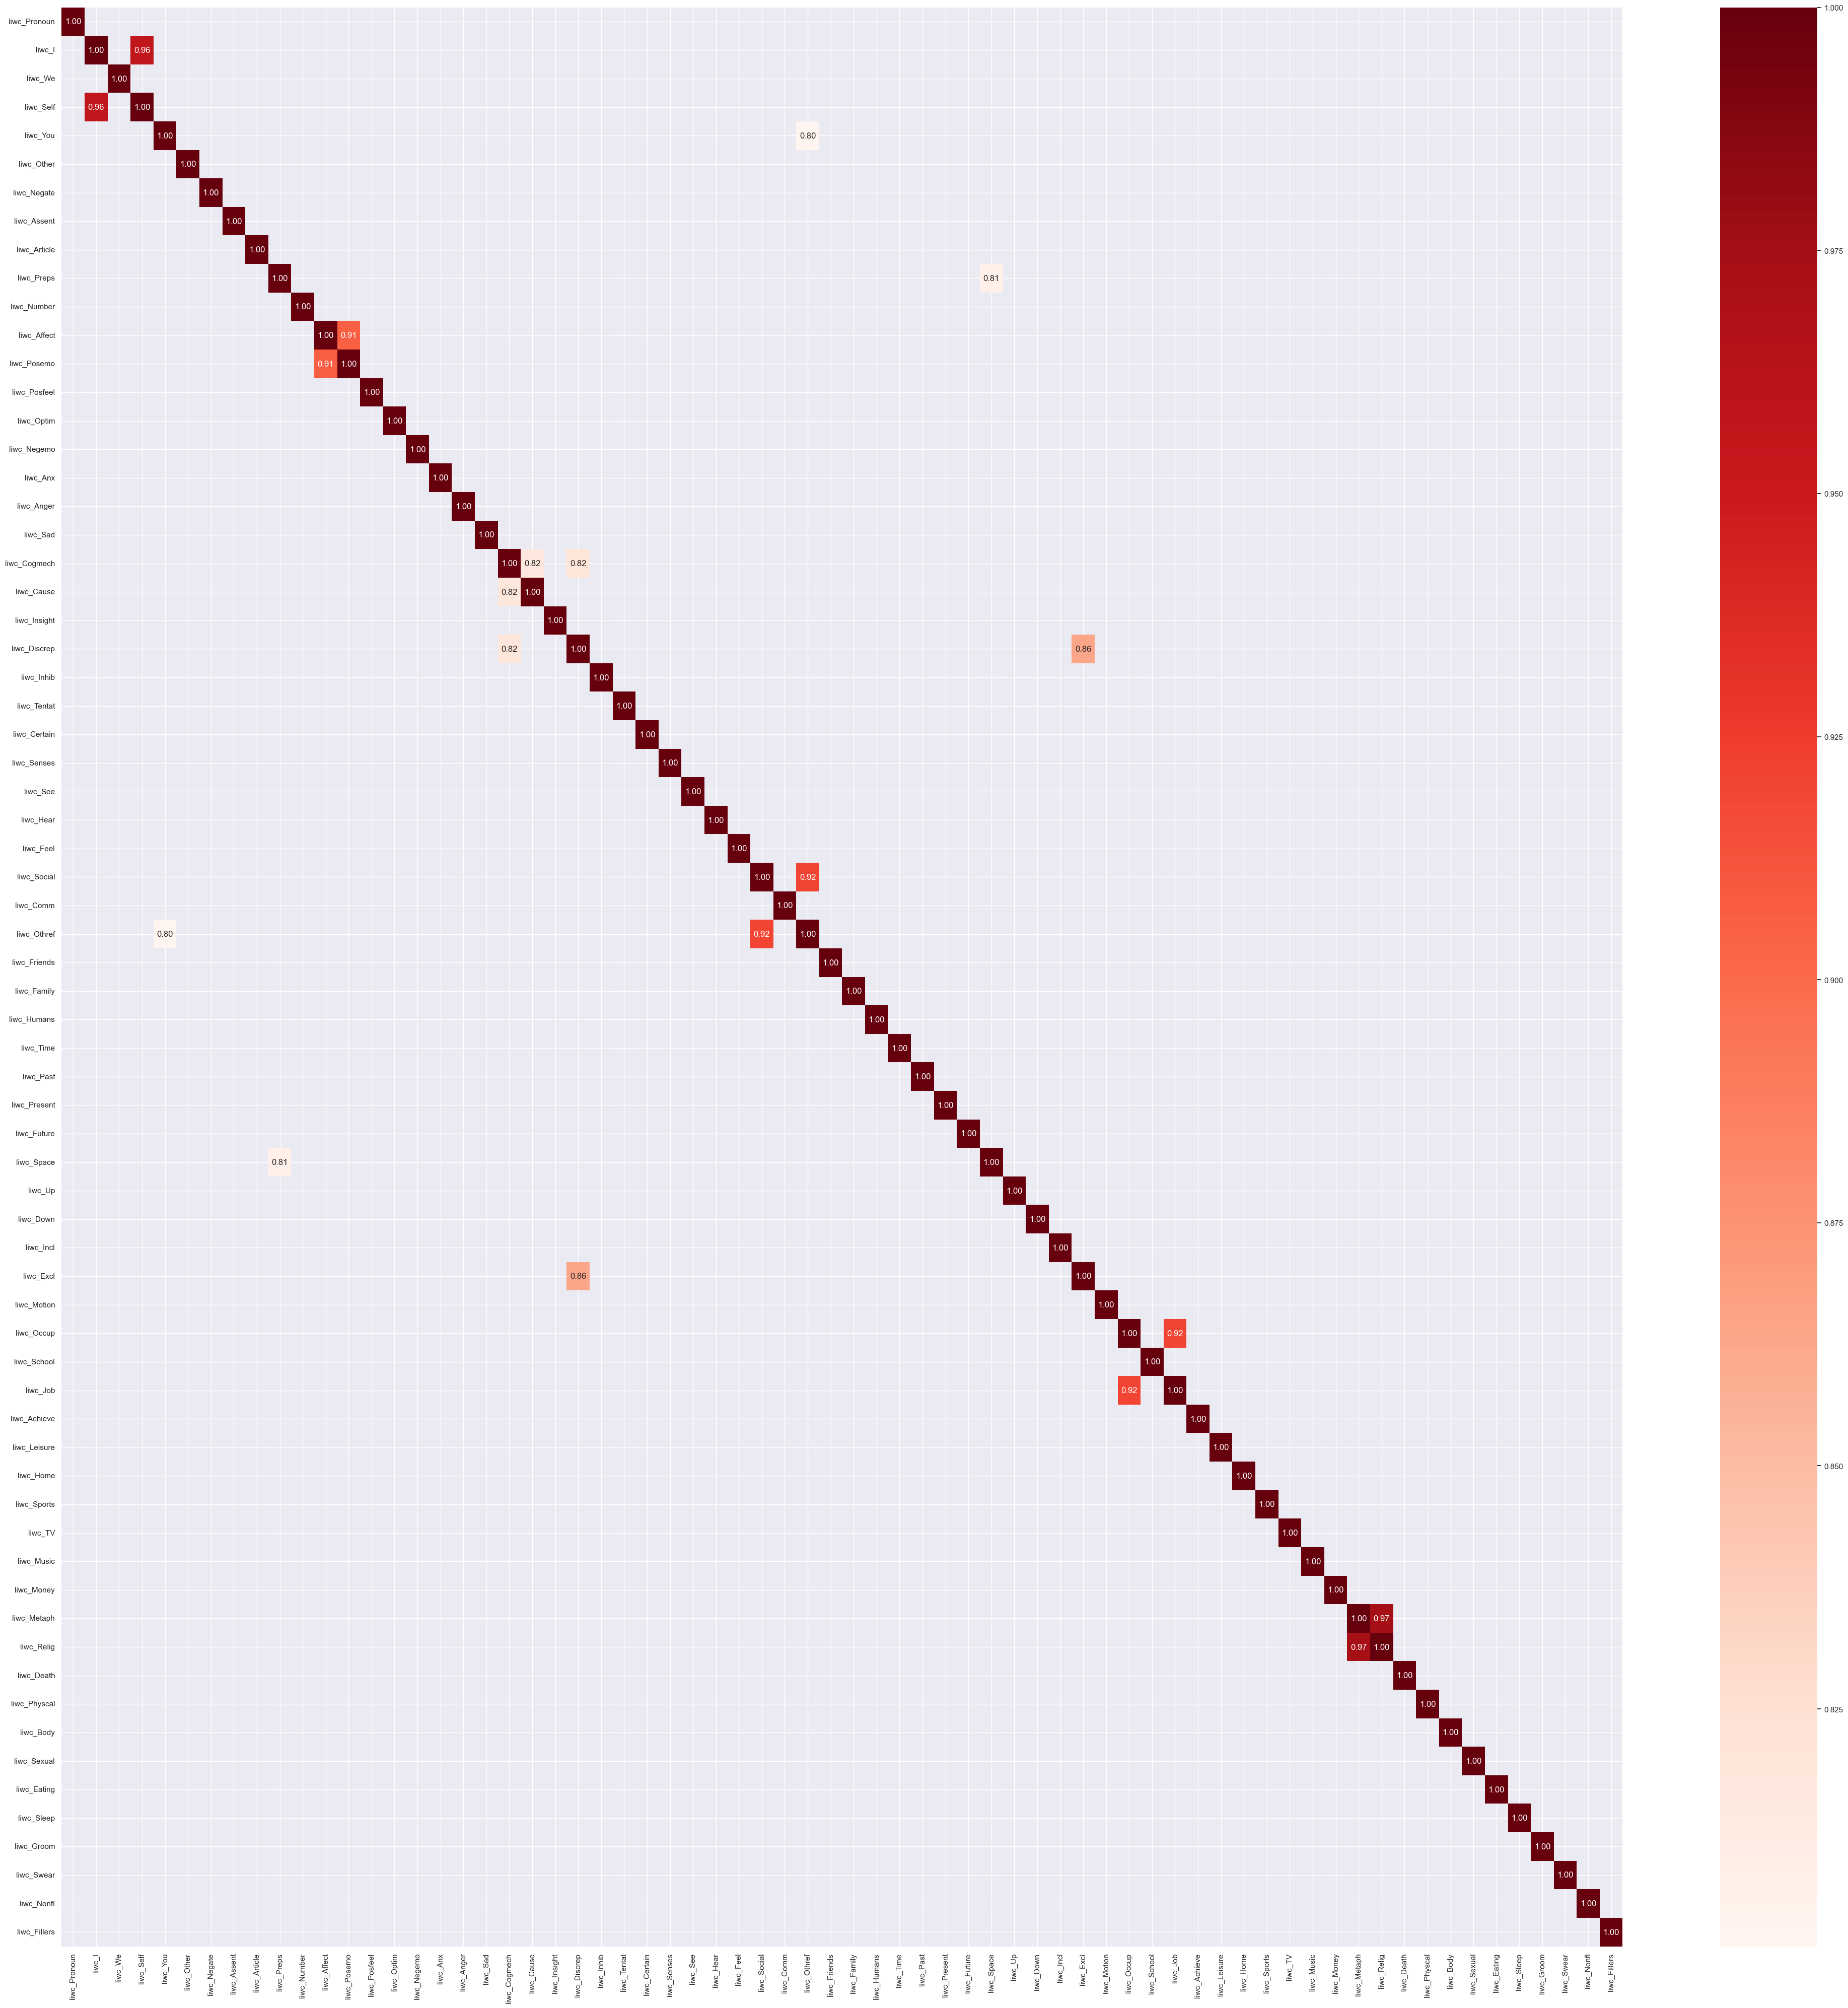

In [19]:
# in matrix, only show corrs over .8
high_corr = corr[abs(corr)>=.8]
plt.figure(figsize=(50,50))
sns.heatmap(high_corr, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [20]:
#print out pairs of highly correlated features incl their correlation
high_corr = high_corr.unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr!=1]
high_corr = high_corr.reset_index()
high_corr.columns = ['feature1', 'feature2', 'correlation']
high_corr = high_corr.drop_duplicates(subset='correlation')
high_corr

feature1      feature2  correlation
0    liwc_Metaph    liwc_Relig     0.974823
2         liwc_I     liwc_Self     0.956790
4    liwc_Social   liwc_Othref     0.920466
6       liwc_Job    liwc_Occup     0.920436
8    liwc_Posemo   liwc_Affect     0.906233
10  liwc_Discrep     liwc_Excl     0.863472
12  liwc_Discrep  liwc_Cogmech     0.818816
14    liwc_Cause  liwc_Cogmech     0.816732
16    liwc_Preps    liwc_Space     0.806753
18      liwc_You   liwc_Othref     0.800581
20  liwc_Pronoun        liwc_I          NaN